In [1]:
import torch
import numpy as np

if torch.cuda.is_available():    

    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:')

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 3 GPU(s) available.
We will use the GPU:


In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
zeroes=[x_train[i].astype(float) for i in range(len(x_train)) if y_train[i]==0]
# zeroes_test=[x_test[i] for i in range(len(x_test)) if y_test[i]==0]
# zeroes.extend(zeroes_test)

ones=[x_train[i].astype(float) for i in range(len(x_train)) if y_train[i]==1]
# ones_test=[x_test[i] for i in range(len(x_test)) if y_test[i]==1]
# ones.extend(ones_test)

nines=[x_train[i].astype(float) for i in range(len(x_train)) if y_train[i]==9]
# nines_test=[x_test[i] for i in range(len(x_test)) if y_test[i]==9]
# nines.extend(nines_test)


In [4]:
zeroes_test=[x_test[i].astype(float) for i in range(len(x_test)) if y_test[i]==0]
ones_test=[x_test[i].astype(float) for i in range(len(x_test)) if y_test[i]==1]
nines_test=[x_test[i].astype(float) for i in range(len(x_test)) if y_test[i]==9]





In [5]:
import random
zeroes1= list(random.choices(zeroes, k=100))
ones1= list(random.choices(ones, k=100))
nines1= list(random.choices(nines, k=100))

In [6]:
zeroes1_test= list(random.choices(zeroes_test, k=100))
ones1_test= list(random.choices(ones_test, k=100))
nines1_test= list(random.choices(nines_test, k=100))

In [7]:
zeroes1= list([zeroes1[i].ravel().tolist() for i in range(len(zeroes1))])
ones1= list([ones1[i].ravel().tolist() for i in range(len(ones1))])
nines1= list([nines1[i].ravel().tolist() for i in range(len(nines1))])


In [8]:
zeroes1_test= list([zeroes1_test[i].ravel().tolist() for i in range(len(zeroes1_test))])
ones1_test= list([ones1_test[i].ravel().tolist() for i in range(len(ones1_test))])
nines1_test= list([nines1_test[i].ravel().tolist() for i in range(len(nines1_test))])

In [9]:
train_inputs=[[random.choice(zeroes1),random.choice(ones1)] for i in range(1000)]
train_inputs=train_inputs+[[random.choice(zeroes1),random.choice(ones1),random.choice(nines1)] for i in range(1000)]
train_inputs=train_inputs+[[random.choice(ones1),random.choice(nines1)] for i in range(1000)]


train_labels=[[float(9),float(1)] for i in range(1000)]+[[float(1),float(8),float(1)] for i in range(1000)]+[[float(1),float(9)] for i in range(1000)]





In [10]:
validation_inputs=[[random.choice(zeroes1_test),random.choice(ones1_test)] for i in range(1000)]
validation_inputs=validation_inputs+[[random.choice(zeroes1_test),random.choice(ones1_test),random.choice(nines1_test)] for i in range(1000)]
validation_inputs=validation_inputs+[[random.choice(ones1_test),random.choice(nines1_test)] for i in range(1000)]



In [11]:
from keras.preprocessing.sequence import pad_sequences
MAX_LEN = 3

print('\nPadding/truncating all assortments to %d values...' % MAX_LEN)
train_inputs= pad_sequences(train_inputs, maxlen=MAX_LEN, dtype="float", truncating="post", padding="post").tolist()
train_labels= pad_sequences(train_labels, maxlen=MAX_LEN, dtype="float", truncating="post", padding="post").tolist()

print('\nDone.')


Padding/truncating all assortments to 3 values...

Done.


In [12]:


validation_inputs= pad_sequences(validation_inputs, maxlen=MAX_LEN, dtype="float", truncating="post", padding="post").tolist()

In [13]:
attention_masks = []

# For each assortment...
for num in train_inputs:
    
    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(sum(number) > 0) for number  in num]
    
    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

In [14]:
attention_masks

[[1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1, 1, 0],
 [1,

In [15]:
import torch
train_inputs = torch.tensor(train_inputs)
# validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
# validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(attention_masks)
# validation_masks = torch.tensor(validation_masks)


In [16]:
validation_inputs = torch.tensor(validation_inputs)



In [17]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size =32

train_data = TensorDataset(train_inputs,train_masks,train_labels)
train_sampler = SequentialSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)



In [18]:
batch_size =1
validation_data = TensorDataset(validation_inputs,train_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)



In [19]:
train_data[0][0].size()

torch.Size([3, 784])

In [21]:
import sys
sys.path.insert(1, 'pro-bert')
    
from modeling_bert import ProductBert,BertConfig

import torch

configuration = BertConfig()


model = ProductBert(configuration)



In [23]:
model.cuda()

ProductBert(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(92354, 784, padding_idx=0)
      (position_embeddings): Embedding(512, 784)
      (token_type_embeddings): Embedding(2, 784)
      (LayerNorm): LayerNorm((784,), eps=1e-08, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=784, out_features=784, bias=True)
              (key): Linear(in_features=784, out_features=784, bias=True)
              (value): Linear(in_features=784, out_features=784, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=784, out_features=784, bias=True)
              (LayerNorm): LayerNorm((784,), eps=1e-08, elementwise_affine=True)


In [24]:

model.parameters()

<generator object Module.parameters at 0x2b41669e36d0>

In [25]:
params = list(model.named_parameters())
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))


The BERT model has 41 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (92354, 784)
bert.embeddings.position_embeddings.weight                (512, 784)
bert.embeddings.token_type_embeddings.weight                (2, 784)
bert.embeddings.LayerNorm.weight                              (784,)
bert.embeddings.LayerNorm.bias                                (784,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (784, 784)
bert.encoder.layer.0.attention.self.query.bias                (784,)
bert.encoder.layer.0.attention.self.key.weight            (784, 784)
bert.encoder.layer.0.attention.self.key.bias                  (784,)
bert.encoder.layer.0.attention.self.value.weight          (784, 784)
bert.encoder.layer.0.attention.self.value.bias                (784,)
bert.encoder.layer.0.attention.output.dense.weight        (784, 784)
bert.encoder.layer.0.attention.output.dense.bias              (7

In [26]:
from transformers import  AdamW
import torch.optim
optimizer=torch.optim.SGD(model.parameters(), lr=5e-3)
# optimizer = AdamW(model.parameters(),
#                   lr = 5e-3, # args.learning_rate - default is 5e-5, our notebook had 2e-5
#                   eps = 1e-6 # args.adam_epsilon  - default is 1e-8.
#                 )
optimizer=torch.optim.Adam(model.parameters(),lr=0.0001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

In [27]:

from transformers import get_linear_schedule_with_warmup

# Number of training epochs 
epochs = 50

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [28]:
import time
import datetime

def format_time(elapsed):

    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [29]:
import random
import time
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
# model.to(device)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    model.train()
    

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        b_input_ids = batch[0].to(device)
        b_attention_mask=batch[1].to(device)
        b_labels = batch[2].to(device)

 
        model.zero_grad()        

        outputs = model(inputs_embeds=b_input_ids, 
#                     token_type_ids=None, 
                    attention_mask=None, 
                    labels=b_labels)        
    
        loss = outputs[0]
        if step%1==0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}. with Loss: {:} with total_loss: {:}'.format(step, len(train_dataloader), elapsed,loss.item(),total_loss))

        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

    
        optimizer.step()

        # Update the learning rate.
        scheduler.step()
#         
        # Report progress.

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)  

    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
print("")
print("Training complete!")


======== Epoch 1 / 50 ========
Training...
  Batch     0  of     94.    Elapsed: 0:00:00. with Loss: 27.82468605041504 with total_loss: 0
  Batch     1  of     94.    Elapsed: 0:00:00. with Loss: 22.131803512573242 with total_loss: 27.82468605041504
  Batch     2  of     94.    Elapsed: 0:00:00. with Loss: 17.78702163696289 with total_loss: 49.95648956298828
  Batch     3  of     94.    Elapsed: 0:00:00. with Loss: 15.476485252380371 with total_loss: 67.74351119995117
  Batch     4  of     94.    Elapsed: 0:00:00. with Loss: 12.905777931213379 with total_loss: 83.21999645233154
  Batch     5  of     94.    Elapsed: 0:00:00. with Loss: 12.113822937011719 with total_loss: 96.12577438354492
  Batch     6  of     94.    Elapsed: 0:00:00. with Loss: 10.35581111907959 with total_loss: 108.23959732055664
  Batch     7  of     94.    Elapsed: 0:00:00. with Loss: 8.35155200958252 with total_loss: 118.59540843963623
  Batch     8  of     94.    Elapsed: 0:00:00. with Loss: 6.644205570220947 wit

  Batch    79  of     94.    Elapsed: 0:00:02. with Loss: 0.5355896353721619 with total_loss: 438.2721417248249
  Batch    80  of     94.    Elapsed: 0:00:02. with Loss: 0.48587027192115784 with total_loss: 438.80773136019707
  Batch    81  of     94.    Elapsed: 0:00:02. with Loss: 0.44436773657798767 with total_loss: 439.2936016321182
  Batch    82  of     94.    Elapsed: 0:00:02. with Loss: 0.4418048560619354 with total_loss: 439.7379693686962
  Batch    83  of     94.    Elapsed: 0:00:02. with Loss: 0.5139521360397339 with total_loss: 440.17977422475815
  Batch    84  of     94.    Elapsed: 0:00:02. with Loss: 0.5766659379005432 with total_loss: 440.6937263607979
  Batch    85  of     94.    Elapsed: 0:00:02. with Loss: 0.7098891139030457 with total_loss: 441.2703922986984
  Batch    86  of     94.    Elapsed: 0:00:02. with Loss: 0.43236061930656433 with total_loss: 441.98028141260147
  Batch    87  of     94.    Elapsed: 0:00:02. with Loss: 0.5576223731040955 with total_loss: 442.

  Batch    62  of     94.    Elapsed: 0:00:01. with Loss: 2.2331655025482178 with total_loss: 59.180254228413105
  Batch    63  of     94.    Elapsed: 0:00:01. with Loss: 3.3405377864837646 with total_loss: 61.41341973096132
  Batch    64  of     94.    Elapsed: 0:00:01. with Loss: 2.5197126865386963 with total_loss: 64.75395751744509
  Batch    65  of     94.    Elapsed: 0:00:01. with Loss: 1.3672460317611694 with total_loss: 67.27367020398378
  Batch    66  of     94.    Elapsed: 0:00:01. with Loss: 0.5081349611282349 with total_loss: 68.64091623574495
  Batch    67  of     94.    Elapsed: 0:00:01. with Loss: 0.4937942922115326 with total_loss: 69.14905119687319
  Batch    68  of     94.    Elapsed: 0:00:01. with Loss: 0.6232630014419556 with total_loss: 69.64284548908472
  Batch    69  of     94.    Elapsed: 0:00:01. with Loss: 1.8669935464859009 with total_loss: 70.26610849052668
  Batch    70  of     94.    Elapsed: 0:00:01. with Loss: 1.418116569519043 with total_loss: 72.1331020

  Batch    45  of     94.    Elapsed: 0:00:01. with Loss: 0.6602616310119629 with total_loss: 17.19360786676407
  Batch    46  of     94.    Elapsed: 0:00:01. with Loss: 0.6678983569145203 with total_loss: 17.85386949777603
  Batch    47  of     94.    Elapsed: 0:00:01. with Loss: 0.792180061340332 with total_loss: 18.52176785469055
  Batch    48  of     94.    Elapsed: 0:00:01. with Loss: 0.4530004560947418 with total_loss: 19.313947916030884
  Batch    49  of     94.    Elapsed: 0:00:01. with Loss: 0.39382800459861755 with total_loss: 19.766948372125626
  Batch    50  of     94.    Elapsed: 0:00:01. with Loss: 0.5614931583404541 with total_loss: 20.160776376724243
  Batch    51  of     94.    Elapsed: 0:00:01. with Loss: 0.4099667966365814 with total_loss: 20.722269535064697
  Batch    52  of     94.    Elapsed: 0:00:01. with Loss: 0.5063597559928894 with total_loss: 21.13223633170128
  Batch    53  of     94.    Elapsed: 0:00:01. with Loss: 0.801069438457489 with total_loss: 21.6385

  Batch    28  of     94.    Elapsed: 0:00:01. with Loss: 0.04505430534482002 with total_loss: 2.6217722669243813
  Batch    29  of     94.    Elapsed: 0:00:01. with Loss: 0.0696207657456398 with total_loss: 2.6668265722692013
  Batch    30  of     94.    Elapsed: 0:00:01. with Loss: 0.06053159013390541 with total_loss: 2.736447338014841
  Batch    31  of     94.    Elapsed: 0:00:01. with Loss: 0.3482999801635742 with total_loss: 2.7969789281487465
  Batch    32  of     94.    Elapsed: 0:00:01. with Loss: 0.4567527770996094 with total_loss: 3.1452789083123207
  Batch    33  of     94.    Elapsed: 0:00:01. with Loss: 0.41790464520454407 with total_loss: 3.60203168541193
  Batch    34  of     94.    Elapsed: 0:00:01. with Loss: 0.3470495045185089 with total_loss: 4.019936330616474
  Batch    35  of     94.    Elapsed: 0:00:01. with Loss: 0.32467278838157654 with total_loss: 4.366985835134983
  Batch    36  of     94.    Elapsed: 0:00:01. with Loss: 0.4983498156070709 with total_loss: 4.6

  Batch    10  of     94.    Elapsed: 0:00:00. with Loss: 0.0617789626121521 with total_loss: 0.536614004522562
  Batch    11  of     94.    Elapsed: 0:00:00. with Loss: 0.0492013655602932 with total_loss: 0.5983929671347141
  Batch    12  of     94.    Elapsed: 0:00:00. with Loss: 0.05352373793721199 with total_loss: 0.6475943326950073
  Batch    13  of     94.    Elapsed: 0:00:00. with Loss: 0.08454068750143051 with total_loss: 0.7011180706322193
  Batch    14  of     94.    Elapsed: 0:00:00. with Loss: 0.08088713139295578 with total_loss: 0.7856587581336498
  Batch    15  of     94.    Elapsed: 0:00:00. with Loss: 0.04583637788891792 with total_loss: 0.8665458895266056
  Batch    16  of     94.    Elapsed: 0:00:00. with Loss: 0.06270525604486465 with total_loss: 0.9123822674155235
  Batch    17  of     94.    Elapsed: 0:00:00. with Loss: 0.06132635474205017 with total_loss: 0.9750875234603882
  Batch    18  of     94.    Elapsed: 0:00:00. with Loss: 0.07734833657741547 with total_lo

  Batch    87  of     94.    Elapsed: 0:00:02. with Loss: 0.04202054813504219 with total_loss: 10.459306770935655
  Batch    88  of     94.    Elapsed: 0:00:02. with Loss: 0.053507644683122635 with total_loss: 10.501327319070697
  Batch    89  of     94.    Elapsed: 0:00:02. with Loss: 0.05997588858008385 with total_loss: 10.55483496375382
  Batch    90  of     94.    Elapsed: 0:00:02. with Loss: 0.03699998930096626 with total_loss: 10.614810852333903
  Batch    91  of     94.    Elapsed: 0:00:02. with Loss: 0.033489909023046494 with total_loss: 10.65181084163487
  Batch    92  of     94.    Elapsed: 0:00:02. with Loss: 0.03193524107336998 with total_loss: 10.685300750657916
  Batch    93  of     94.    Elapsed: 0:00:02. with Loss: 0.04145081341266632 with total_loss: 10.717235991731286

  Average training loss: 0.11
  Training epcoh took: 0:00:02

======== Epoch 6 / 50 ========
Training...
  Batch     0  of     94.    Elapsed: 0:00:00. with Loss: 0.045669879764318466 with total_loss: 

  Batch    70  of     94.    Elapsed: 0:00:01. with Loss: 0.06483510881662369 with total_loss: 7.38089445233345
  Batch    71  of     94.    Elapsed: 0:00:01. with Loss: 0.0448581762611866 with total_loss: 7.445729561150074
  Batch    72  of     94.    Elapsed: 0:00:01. with Loss: 0.03420282527804375 with total_loss: 7.490587737411261
  Batch    73  of     94.    Elapsed: 0:00:01. with Loss: 0.03471654653549194 with total_loss: 7.524790562689304
  Batch    74  of     94.    Elapsed: 0:00:01. with Loss: 0.035589441657066345 with total_loss: 7.559507109224796
  Batch    75  of     94.    Elapsed: 0:00:01. with Loss: 0.04014299437403679 with total_loss: 7.595096550881863
  Batch    76  of     94.    Elapsed: 0:00:01. with Loss: 0.03852228820323944 with total_loss: 7.635239545255899
  Batch    77  of     94.    Elapsed: 0:00:02. with Loss: 0.0344759076833725 with total_loss: 7.673761833459139
  Batch    78  of     94.    Elapsed: 0:00:02. with Loss: 0.05938691273331642 with total_loss: 7.7

  Batch    53  of     94.    Elapsed: 0:00:01. with Loss: 0.11403878778219223 with total_loss: 3.8229601494967937
  Batch    54  of     94.    Elapsed: 0:00:01. with Loss: 0.0807308629155159 with total_loss: 3.936998937278986
  Batch    55  of     94.    Elapsed: 0:00:01. with Loss: 0.06934322416782379 with total_loss: 4.017729800194502
  Batch    56  of     94.    Elapsed: 0:00:01. with Loss: 0.07375862449407578 with total_loss: 4.087073024362326
  Batch    57  of     94.    Elapsed: 0:00:01. with Loss: 0.06755771487951279 with total_loss: 4.160831648856401
  Batch    58  of     94.    Elapsed: 0:00:01. with Loss: 0.06699374318122864 with total_loss: 4.228389363735914
  Batch    59  of     94.    Elapsed: 0:00:01. with Loss: 0.09201376885175705 with total_loss: 4.295383106917143
  Batch    60  of     94.    Elapsed: 0:00:01. with Loss: 0.06538455933332443 with total_loss: 4.3873968757689
  Batch    61  of     94.    Elapsed: 0:00:01. with Loss: 0.06028546392917633 with total_loss: 4.4

  Batch    36  of     94.    Elapsed: 0:00:01. with Loss: 0.08462732285261154 with total_loss: 1.1384129505604506
  Batch    37  of     94.    Elapsed: 0:00:01. with Loss: 0.07882995158433914 with total_loss: 1.223040273413062
  Batch    38  of     94.    Elapsed: 0:00:01. with Loss: 0.054501693695783615 with total_loss: 1.3018702249974012
  Batch    39  of     94.    Elapsed: 0:00:01. with Loss: 0.0705694779753685 with total_loss: 1.3563719186931849
  Batch    40  of     94.    Elapsed: 0:00:01. with Loss: 0.1452721506357193 with total_loss: 1.4269413966685534
  Batch    41  of     94.    Elapsed: 0:00:01. with Loss: 0.07157816737890244 with total_loss: 1.5722135473042727
  Batch    42  of     94.    Elapsed: 0:00:01. with Loss: 0.06280065327882767 with total_loss: 1.643791714683175
  Batch    43  of     94.    Elapsed: 0:00:01. with Loss: 0.05386930704116821 with total_loss: 1.7065923679620028
  Batch    44  of     94.    Elapsed: 0:00:01. with Loss: 0.060041215270757675 with total_l

  Batch    19  of     94.    Elapsed: 0:00:00. with Loss: 0.012516113929450512 with total_loss: 0.3555240137502551
  Batch    20  of     94.    Elapsed: 0:00:00. with Loss: 0.13116063177585602 with total_loss: 0.3680401276797056
  Batch    21  of     94.    Elapsed: 0:00:00. with Loss: 0.017010951414704323 with total_loss: 0.49920075945556164
  Batch    22  of     94.    Elapsed: 0:00:00. with Loss: 0.019621362909674644 with total_loss: 0.516211710870266
  Batch    23  of     94.    Elapsed: 0:00:00. with Loss: 0.010765936225652695 with total_loss: 0.5358330737799406
  Batch    24  of     94.    Elapsed: 0:00:00. with Loss: 0.014116816222667694 with total_loss: 0.5465990100055933
  Batch    25  of     94.    Elapsed: 0:00:01. with Loss: 0.015080627985298634 with total_loss: 0.560715826228261
  Batch    26  of     94.    Elapsed: 0:00:01. with Loss: 0.01689543016254902 with total_loss: 0.5757964542135596
  Batch    27  of     94.    Elapsed: 0:00:01. with Loss: 0.018172621726989746 with

  Batch     2  of     94.    Elapsed: 0:00:00. with Loss: 0.15620921552181244 with total_loss: 0.02766404114663601
  Batch     3  of     94.    Elapsed: 0:00:00. with Loss: 0.015408794395625591 with total_loss: 0.18387325666844845
  Batch     4  of     94.    Elapsed: 0:00:00. with Loss: 0.013975861482322216 with total_loss: 0.19928205106407404
  Batch     5  of     94.    Elapsed: 0:00:00. with Loss: 0.014801844023168087 with total_loss: 0.21325791254639626
  Batch     6  of     94.    Elapsed: 0:00:00. with Loss: 0.01675596833229065 with total_loss: 0.22805975656956434
  Batch     7  of     94.    Elapsed: 0:00:00. with Loss: 0.015086990781128407 with total_loss: 0.244815724901855
  Batch     8  of     94.    Elapsed: 0:00:00. with Loss: 0.02050686813890934 with total_loss: 0.2599027156829834
  Batch     9  of     94.    Elapsed: 0:00:00. with Loss: 0.01656654104590416 with total_loss: 0.28040958382189274
  Batch    10  of     94.    Elapsed: 0:00:00. with Loss: 0.018598152324557304 

  Batch    79  of     94.    Elapsed: 0:00:02. with Loss: 0.01414903998374939 with total_loss: 2.12141122110188
  Batch    80  of     94.    Elapsed: 0:00:02. with Loss: 0.012929581105709076 with total_loss: 2.1355602610856295
  Batch    81  of     94.    Elapsed: 0:00:02. with Loss: 0.01596475951373577 with total_loss: 2.1484898421913385
  Batch    82  of     94.    Elapsed: 0:00:02. with Loss: 0.010844714939594269 with total_loss: 2.1644546017050743
  Batch    83  of     94.    Elapsed: 0:00:02. with Loss: 0.016648253425955772 with total_loss: 2.1752993166446686
  Batch    84  of     94.    Elapsed: 0:00:02. with Loss: 0.02279072441160679 with total_loss: 2.1919475700706244
  Batch    85  of     94.    Elapsed: 0:00:02. with Loss: 0.01559132058173418 with total_loss: 2.214738294482231
  Batch    86  of     94.    Elapsed: 0:00:02. with Loss: 0.037039417773485184 with total_loss: 2.2303296150639653
  Batch    87  of     94.    Elapsed: 0:00:02. with Loss: 0.01820760779082775 with tota

  Batch    62  of     94.    Elapsed: 0:00:01. with Loss: 0.016121909022331238 with total_loss: 1.4897917518392205
  Batch    63  of     94.    Elapsed: 0:00:01. with Loss: 0.017837686464190483 with total_loss: 1.5059136608615518
  Batch    64  of     94.    Elapsed: 0:00:01. with Loss: 0.010395356453955173 with total_loss: 1.5237513473257422
  Batch    65  of     94.    Elapsed: 0:00:01. with Loss: 0.012453489005565643 with total_loss: 1.5341467037796974
  Batch    66  of     94.    Elapsed: 0:00:01. with Loss: 0.010853949934244156 with total_loss: 1.546600192785263
  Batch    67  of     94.    Elapsed: 0:00:01. with Loss: 0.01208257395774126 with total_loss: 1.5574541427195072
  Batch    68  of     94.    Elapsed: 0:00:01. with Loss: 0.013677512295544147 with total_loss: 1.5695367166772485
  Batch    69  of     94.    Elapsed: 0:00:01. with Loss: 0.01582610048353672 with total_loss: 1.5832142289727926
  Batch    70  of     94.    Elapsed: 0:00:01. with Loss: 0.01378168910741806 with 

  Batch    45  of     94.    Elapsed: 0:00:01. with Loss: 0.018659571185708046 with total_loss: 0.7617493271827698
  Batch    46  of     94.    Elapsed: 0:00:01. with Loss: 0.018330944702029228 with total_loss: 0.7804088983684778
  Batch    47  of     94.    Elapsed: 0:00:01. with Loss: 0.016980234533548355 with total_loss: 0.798739843070507
  Batch    48  of     94.    Elapsed: 0:00:01. with Loss: 0.01725608855485916 with total_loss: 0.8157200776040554
  Batch    49  of     94.    Elapsed: 0:00:01. with Loss: 0.012853850610554218 with total_loss: 0.8329761661589146
  Batch    50  of     94.    Elapsed: 0:00:01. with Loss: 0.02123684249818325 with total_loss: 0.8458300167694688
  Batch    51  of     94.    Elapsed: 0:00:01. with Loss: 0.015120044350624084 with total_loss: 0.867066859267652
  Batch    52  of     94.    Elapsed: 0:00:01. with Loss: 0.019418062642216682 with total_loss: 0.8821869036182761
  Batch    53  of     94.    Elapsed: 0:00:01. with Loss: 0.016838403418660164 with 

  Batch    28  of     94.    Elapsed: 0:00:01. with Loss: 0.01090295147150755 with total_loss: 0.35487307561561465
  Batch    29  of     94.    Elapsed: 0:00:01. with Loss: 0.011586946435272694 with total_loss: 0.3657760270871222
  Batch    30  of     94.    Elapsed: 0:00:01. with Loss: 0.008440623059868813 with total_loss: 0.3773629735223949
  Batch    31  of     94.    Elapsed: 0:00:01. with Loss: 0.038250237703323364 with total_loss: 0.3858035965822637
  Batch    32  of     94.    Elapsed: 0:00:01. with Loss: 0.028319552540779114 with total_loss: 0.4240538342855871
  Batch    33  of     94.    Elapsed: 0:00:01. with Loss: 0.027701733633875847 with total_loss: 0.4523733868263662
  Batch    34  of     94.    Elapsed: 0:00:01. with Loss: 0.027998073026537895 with total_loss: 0.48007512046024203
  Batch    35  of     94.    Elapsed: 0:00:01. with Loss: 0.02119472436606884 with total_loss: 0.5080731934867799
  Batch    36  of     94.    Elapsed: 0:00:01. with Loss: 0.039028916507959366 w

  Batch    10  of     94.    Elapsed: 0:00:00. with Loss: 0.00949530303478241 with total_loss: 0.10523077612742782
  Batch    11  of     94.    Elapsed: 0:00:00. with Loss: 0.0121377008035779 with total_loss: 0.11472607916221023
  Batch    12  of     94.    Elapsed: 0:00:00. with Loss: 0.012394580990076065 with total_loss: 0.12686377996578813
  Batch    13  of     94.    Elapsed: 0:00:00. with Loss: 0.016139457002282143 with total_loss: 0.1392583609558642
  Batch    14  of     94.    Elapsed: 0:00:00. with Loss: 0.009780042804777622 with total_loss: 0.15539781795814633
  Batch    15  of     94.    Elapsed: 0:00:00. with Loss: 0.01079337764531374 with total_loss: 0.16517786076292396
  Batch    16  of     94.    Elapsed: 0:00:00. with Loss: 0.010408059693872929 with total_loss: 0.1759712384082377
  Batch    17  of     94.    Elapsed: 0:00:00. with Loss: 0.007763861212879419 with total_loss: 0.18637929810211062
  Batch    18  of     94.    Elapsed: 0:00:00. with Loss: 0.01027380395680666 

  Batch    87  of     94.    Elapsed: 0:00:02. with Loss: 0.008846254087984562 with total_loss: 1.1658347877673805
  Batch    88  of     94.    Elapsed: 0:00:02. with Loss: 0.01129921805113554 with total_loss: 1.174681041855365
  Batch    89  of     94.    Elapsed: 0:00:02. with Loss: 0.009750908240675926 with total_loss: 1.1859802599065006
  Batch    90  of     94.    Elapsed: 0:00:02. with Loss: 0.008989933878183365 with total_loss: 1.1957311681471765
  Batch    91  of     94.    Elapsed: 0:00:02. with Loss: 0.009696408174932003 with total_loss: 1.2047211020253599
  Batch    92  of     94.    Elapsed: 0:00:02. with Loss: 0.01491533499211073 with total_loss: 1.2144175102002919
  Batch    93  of     94.    Elapsed: 0:00:02. with Loss: 0.009760401211678982 with total_loss: 1.2293328451924026

  Average training loss: 0.01
  Training epcoh took: 0:00:02

======== Epoch 15 / 50 ========
Training...
  Batch     0  of     94.    Elapsed: 0:00:00. with Loss: 0.007142116781324148 with total_l

  Batch    70  of     94.    Elapsed: 0:00:01. with Loss: 0.007579388562589884 with total_loss: 0.7943430915474892
  Batch    71  of     94.    Elapsed: 0:00:01. with Loss: 0.011333540081977844 with total_loss: 0.801922480110079
  Batch    72  of     94.    Elapsed: 0:00:01. with Loss: 0.009735743515193462 with total_loss: 0.8132560201920569
  Batch    73  of     94.    Elapsed: 0:00:01. with Loss: 0.014478436671197414 with total_loss: 0.8229917637072504
  Batch    74  of     94.    Elapsed: 0:00:01. with Loss: 0.0131447808817029 with total_loss: 0.8374702003784478
  Batch    75  of     94.    Elapsed: 0:00:01. with Loss: 0.07446246594190598 with total_loss: 0.8506149812601507
  Batch    76  of     94.    Elapsed: 0:00:02. with Loss: 0.008887799456715584 with total_loss: 0.9250774472020566
  Batch    77  of     94.    Elapsed: 0:00:02. with Loss: 0.008521190844476223 with total_loss: 0.9339652466587722
  Batch    78  of     94.    Elapsed: 0:00:02. with Loss: 0.009327572770416737 with 

  Batch    53  of     94.    Elapsed: 0:00:01. with Loss: 0.016291899606585503 with total_loss: 0.5567468591034412
  Batch    54  of     94.    Elapsed: 0:00:01. with Loss: 0.01193318236619234 with total_loss: 0.5730387587100267
  Batch    55  of     94.    Elapsed: 0:00:01. with Loss: 0.010854288935661316 with total_loss: 0.5849719410762191
  Batch    56  of     94.    Elapsed: 0:00:01. with Loss: 0.010303488932549953 with total_loss: 0.5958262300118804
  Batch    57  of     94.    Elapsed: 0:00:01. with Loss: 0.009768865071237087 with total_loss: 0.6061297189444304
  Batch    58  of     94.    Elapsed: 0:00:01. with Loss: 0.012654553167521954 with total_loss: 0.6158985840156674
  Batch    59  of     94.    Elapsed: 0:00:01. with Loss: 0.010516178794205189 with total_loss: 0.6285531371831894
  Batch    60  of     94.    Elapsed: 0:00:01. with Loss: 0.01730826310813427 with total_loss: 0.6390693159773946
  Batch    61  of     94.    Elapsed: 0:00:01. with Loss: 0.012855670414865017 wit

  Batch    36  of     94.    Elapsed: 0:00:01. with Loss: 0.010985252447426319 with total_loss: 0.3528769174590707
  Batch    37  of     94.    Elapsed: 0:00:01. with Loss: 0.01297839730978012 with total_loss: 0.363862169906497
  Batch    38  of     94.    Elapsed: 0:00:01. with Loss: 0.013355881907045841 with total_loss: 0.3768405672162771
  Batch    39  of     94.    Elapsed: 0:00:01. with Loss: 0.02207101322710514 with total_loss: 0.39019644912332296
  Batch    40  of     94.    Elapsed: 0:00:01. with Loss: 0.01523541659116745 with total_loss: 0.4122674623504281
  Batch    41  of     94.    Elapsed: 0:00:01. with Loss: 0.013247114606201649 with total_loss: 0.42750287894159555
  Batch    42  of     94.    Elapsed: 0:00:01. with Loss: 0.008102059364318848 with total_loss: 0.4407499935477972
  Batch    43  of     94.    Elapsed: 0:00:01. with Loss: 0.008608747273683548 with total_loss: 0.44885205291211605
  Batch    44  of     94.    Elapsed: 0:00:01. with Loss: 0.009058726020157337 wi

  Batch    19  of     94.    Elapsed: 0:00:00. with Loss: 0.007566423621028662 with total_loss: 0.1381022143177688
  Batch    20  of     94.    Elapsed: 0:00:00. with Loss: 0.005902873817831278 with total_loss: 0.14566863793879747
  Batch    21  of     94.    Elapsed: 0:00:00. with Loss: 0.008562873117625713 with total_loss: 0.15157151175662875
  Batch    22  of     94.    Elapsed: 0:00:00. with Loss: 0.004335909616202116 with total_loss: 0.16013438487425447
  Batch    23  of     94.    Elapsed: 0:00:00. with Loss: 0.008011535741388798 with total_loss: 0.16447029449045658
  Batch    24  of     94.    Elapsed: 0:00:00. with Loss: 0.00775822764262557 with total_loss: 0.17248183023184538
  Batch    25  of     94.    Elapsed: 0:00:01. with Loss: 0.007625889498740435 with total_loss: 0.18024005787447095
  Batch    26  of     94.    Elapsed: 0:00:01. with Loss: 0.007235068827867508 with total_loss: 0.18786594737321138
  Batch    27  of     94.    Elapsed: 0:00:01. with Loss: 0.00602822145447

  Batch     2  of     94.    Elapsed: 0:00:00. with Loss: 0.005367273464798927 with total_loss: 0.014838634058833122
  Batch     3  of     94.    Elapsed: 0:00:00. with Loss: 0.0072718337178230286 with total_loss: 0.02020590752363205
  Batch     4  of     94.    Elapsed: 0:00:00. with Loss: 0.008591384626924992 with total_loss: 0.027477741241455078
  Batch     5  of     94.    Elapsed: 0:00:00. with Loss: 0.005786096211522818 with total_loss: 0.03606912586838007
  Batch     6  of     94.    Elapsed: 0:00:00. with Loss: 0.008640646934509277 with total_loss: 0.04185522207990289
  Batch     7  of     94.    Elapsed: 0:00:00. with Loss: 0.005571444984525442 with total_loss: 0.050495869014412165
  Batch     8  of     94.    Elapsed: 0:00:00. with Loss: 0.006762949284166098 with total_loss: 0.05606731399893761
  Batch     9  of     94.    Elapsed: 0:00:00. with Loss: 0.00781914684921503 with total_loss: 0.0628302632831037
  Batch    10  of     94.    Elapsed: 0:00:00. with Loss: 0.0065219267

  Batch    79  of     94.    Elapsed: 0:00:02. with Loss: 0.006283685099333525 with total_loss: 0.6350286891683936
  Batch    80  of     94.    Elapsed: 0:00:02. with Loss: 0.007746016141027212 with total_loss: 0.6413123742677271
  Batch    81  of     94.    Elapsed: 0:00:02. with Loss: 0.008823872543871403 with total_loss: 0.6490583904087543
  Batch    82  of     94.    Elapsed: 0:00:02. with Loss: 0.007382331416010857 with total_loss: 0.6578822629526258
  Batch    83  of     94.    Elapsed: 0:00:02. with Loss: 0.00743073271587491 with total_loss: 0.6652645943686366
  Batch    84  of     94.    Elapsed: 0:00:02. with Loss: 0.005762333050370216 with total_loss: 0.6726953270845115
  Batch    85  of     94.    Elapsed: 0:00:02. with Loss: 0.0067430161871016026 with total_loss: 0.6784576601348817
  Batch    86  of     94.    Elapsed: 0:00:02. with Loss: 0.008040166459977627 with total_loss: 0.6852006763219833
  Batch    87  of     94.    Elapsed: 0:00:02. with Loss: 0.008968643844127655 w

  Batch    62  of     94.    Elapsed: 0:00:01. with Loss: 0.011743664741516113 with total_loss: 0.5249770302325487
  Batch    63  of     94.    Elapsed: 0:00:01. with Loss: 0.006666472647339106 with total_loss: 0.5367206949740648
  Batch    64  of     94.    Elapsed: 0:00:01. with Loss: 0.0071275378577411175 with total_loss: 0.5433871676214039
  Batch    65  of     94.    Elapsed: 0:00:01. with Loss: 0.00786497164517641 with total_loss: 0.550514705479145
  Batch    66  of     94.    Elapsed: 0:00:01. with Loss: 0.004991308785974979 with total_loss: 0.5583796771243215
  Batch    67  of     94.    Elapsed: 0:00:01. with Loss: 0.004555809777230024 with total_loss: 0.5633709859102964
  Batch    68  of     94.    Elapsed: 0:00:01. with Loss: 0.00794840045273304 with total_loss: 0.5679267956875265
  Batch    69  of     94.    Elapsed: 0:00:01. with Loss: 0.006160980090498924 with total_loss: 0.5758751961402595
  Batch    70  of     94.    Elapsed: 0:00:01. with Loss: 0.006918972358107567 wit

  Batch    45  of     94.    Elapsed: 0:00:01. with Loss: 0.009884797967970371 with total_loss: 0.34934656834229827
  Batch    46  of     94.    Elapsed: 0:00:01. with Loss: 0.012944977730512619 with total_loss: 0.35923136631026864
  Batch    47  of     94.    Elapsed: 0:00:01. with Loss: 0.007082939147949219 with total_loss: 0.37217634404078126
  Batch    48  of     94.    Elapsed: 0:00:01. with Loss: 0.005727261304855347 with total_loss: 0.3792592831887305
  Batch    49  of     94.    Elapsed: 0:00:01. with Loss: 0.007587514817714691 with total_loss: 0.3849865444935858
  Batch    50  of     94.    Elapsed: 0:00:01. with Loss: 0.011731733568012714 with total_loss: 0.3925740593113005
  Batch    51  of     94.    Elapsed: 0:00:01. with Loss: 0.00659954734146595 with total_loss: 0.40430579287931323
  Batch    52  of     94.    Elapsed: 0:00:01. with Loss: 0.00595086207613349 with total_loss: 0.4109053402207792
  Batch    53  of     94.    Elapsed: 0:00:01. with Loss: 0.00862076785415411 

  Batch    28  of     94.    Elapsed: 0:00:01. with Loss: 0.00535714952275157 with total_loss: 0.28674573777243495
  Batch    29  of     94.    Elapsed: 0:00:01. with Loss: 0.011359279043972492 with total_loss: 0.2921028872951865
  Batch    30  of     94.    Elapsed: 0:00:01. with Loss: 0.008831948041915894 with total_loss: 0.303462166339159
  Batch    31  of     94.    Elapsed: 0:00:01. with Loss: 0.009312618523836136 with total_loss: 0.3122941143810749
  Batch    32  of     94.    Elapsed: 0:00:01. with Loss: 0.008583800867199898 with total_loss: 0.32160673290491104
  Batch    33  of     94.    Elapsed: 0:00:01. with Loss: 0.008554971776902676 with total_loss: 0.33019053377211094
  Batch    34  of     94.    Elapsed: 0:00:01. with Loss: 0.012292306870222092 with total_loss: 0.3387455055490136
  Batch    35  of     94.    Elapsed: 0:00:01. with Loss: 0.008649833500385284 with total_loss: 0.3510378124192357
  Batch    36  of     94.    Elapsed: 0:00:01. with Loss: 0.009088433347642422 

  Batch    10  of     94.    Elapsed: 0:00:00. with Loss: 0.005110831465572119 with total_loss: 0.05567585374228656
  Batch    11  of     94.    Elapsed: 0:00:00. with Loss: 0.008365419693291187 with total_loss: 0.06078668520785868
  Batch    12  of     94.    Elapsed: 0:00:00. with Loss: 0.007313277572393417 with total_loss: 0.06915210490114987
  Batch    13  of     94.    Elapsed: 0:00:00. with Loss: 0.0070619466714560986 with total_loss: 0.07646538247354329
  Batch    14  of     94.    Elapsed: 0:00:00. with Loss: 0.005231168586760759 with total_loss: 0.08352732914499938
  Batch    15  of     94.    Elapsed: 0:00:00. with Loss: 0.0068933540023863316 with total_loss: 0.08875849773176014
  Batch    16  of     94.    Elapsed: 0:00:00. with Loss: 0.006683280225843191 with total_loss: 0.09565185173414648
  Batch    17  of     94.    Elapsed: 0:00:00. with Loss: 0.006400486920028925 with total_loss: 0.10233513195998967
  Batch    18  of     94.    Elapsed: 0:00:00. with Loss: 0.0065368390

  Batch    87  of     94.    Elapsed: 0:00:02. with Loss: 0.004841609857976437 with total_loss: 0.599481467390433
  Batch    88  of     94.    Elapsed: 0:00:02. with Loss: 0.006950305309146643 with total_loss: 0.6043230772484094
  Batch    89  of     94.    Elapsed: 0:00:02. with Loss: 0.006074863951653242 with total_loss: 0.611273382557556
  Batch    90  of     94.    Elapsed: 0:00:02. with Loss: 0.004556789994239807 with total_loss: 0.6173482465092093
  Batch    91  of     94.    Elapsed: 0:00:02. with Loss: 0.006383026018738747 with total_loss: 0.6219050365034491
  Batch    92  of     94.    Elapsed: 0:00:02. with Loss: 0.00462179584428668 with total_loss: 0.6282880625221878
  Batch    93  of     94.    Elapsed: 0:00:02. with Loss: 0.005228870548307896 with total_loss: 0.6329098583664745

  Average training loss: 0.01
  Training epcoh took: 0:00:02

======== Epoch 24 / 50 ========
Training...
  Batch     0  of     94.    Elapsed: 0:00:00. with Loss: 0.00499745924025774 with total_lo

  Batch    70  of     94.    Elapsed: 0:00:01. with Loss: 0.006420116871595383 with total_loss: 0.5484541258774698
  Batch    71  of     94.    Elapsed: 0:00:01. with Loss: 0.004615596029907465 with total_loss: 0.5548742427490652
  Batch    72  of     94.    Elapsed: 0:00:01. with Loss: 0.005669538397341967 with total_loss: 0.5594898387789726
  Batch    73  of     94.    Elapsed: 0:00:01. with Loss: 0.005504237022250891 with total_loss: 0.5651593771763146
  Batch    74  of     94.    Elapsed: 0:00:01. with Loss: 0.00736111169680953 with total_loss: 0.5706636141985655
  Batch    75  of     94.    Elapsed: 0:00:01. with Loss: 0.004983162507414818 with total_loss: 0.578024725895375
  Batch    76  of     94.    Elapsed: 0:00:02. with Loss: 0.005893402267247438 with total_loss: 0.5830078884027898
  Batch    77  of     94.    Elapsed: 0:00:02. with Loss: 0.006130510941147804 with total_loss: 0.5889012906700373
  Batch    78  of     94.    Elapsed: 0:00:02. with Loss: 0.006238877307623625 wit

  Batch    53  of     94.    Elapsed: 0:00:01. with Loss: 0.019331635907292366 with total_loss: 0.3165129227563739
  Batch    54  of     94.    Elapsed: 0:00:01. with Loss: 0.005153816659003496 with total_loss: 0.33584455866366625
  Batch    55  of     94.    Elapsed: 0:00:01. with Loss: 0.007155189756304026 with total_loss: 0.34099837532266974
  Batch    56  of     94.    Elapsed: 0:00:01. with Loss: 0.005847638938575983 with total_loss: 0.34815356507897377
  Batch    57  of     94.    Elapsed: 0:00:01. with Loss: 0.005508605390787125 with total_loss: 0.35400120401754975
  Batch    58  of     94.    Elapsed: 0:00:01. with Loss: 0.005146319977939129 with total_loss: 0.3595098094083369
  Batch    59  of     94.    Elapsed: 0:00:01. with Loss: 0.00623677670955658 with total_loss: 0.364656129386276
  Batch    60  of     94.    Elapsed: 0:00:01. with Loss: 0.006339605897665024 with total_loss: 0.3708929060958326
  Batch    61  of     94.    Elapsed: 0:00:01. with Loss: 0.006403892766684294

  Batch    36  of     94.    Elapsed: 0:00:01. with Loss: 0.029425665736198425 with total_loss: 0.26394897885620594
  Batch    37  of     94.    Elapsed: 0:00:01. with Loss: 0.008192283101379871 with total_loss: 0.29337464459240437
  Batch    38  of     94.    Elapsed: 0:00:01. with Loss: 0.005741063039749861 with total_loss: 0.30156692769378424
  Batch    39  of     94.    Elapsed: 0:00:01. with Loss: 0.008726686239242554 with total_loss: 0.3073079907335341
  Batch    40  of     94.    Elapsed: 0:00:01. with Loss: 0.020429501309990883 with total_loss: 0.31603467697277665
  Batch    41  of     94.    Elapsed: 0:00:01. with Loss: 0.007475750055164099 with total_loss: 0.33646417828276753
  Batch    42  of     94.    Elapsed: 0:00:01. with Loss: 0.007494036108255386 with total_loss: 0.34393992833793163
  Batch    43  of     94.    Elapsed: 0:00:01. with Loss: 0.005897084251046181 with total_loss: 0.351433964446187
  Batch    44  of     94.    Elapsed: 0:00:01. with Loss: 0.007728555705398

  Batch    19  of     94.    Elapsed: 0:00:00. with Loss: 0.006552569568157196 with total_loss: 0.09925472130998969
  Batch    20  of     94.    Elapsed: 0:00:00. with Loss: 0.004426304250955582 with total_loss: 0.10580729087814689
  Batch    21  of     94.    Elapsed: 0:00:00. with Loss: 0.0037371504586189985 with total_loss: 0.11023359512910247
  Batch    22  of     94.    Elapsed: 0:00:00. with Loss: 0.004635979887098074 with total_loss: 0.11397074558772147
  Batch    23  of     94.    Elapsed: 0:00:00. with Loss: 0.004587224218994379 with total_loss: 0.11860672547481954
  Batch    24  of     94.    Elapsed: 0:00:00. with Loss: 0.004761071410030127 with total_loss: 0.12319394969381392
  Batch    25  of     94.    Elapsed: 0:00:01. with Loss: 0.004739308264106512 with total_loss: 0.12795502110384405
  Batch    26  of     94.    Elapsed: 0:00:01. with Loss: 0.0039502475410699844 with total_loss: 0.13269432936795056
  Batch    27  of     94.    Elapsed: 0:00:01. with Loss: 0.0048101074

  Batch     2  of     94.    Elapsed: 0:00:00. with Loss: 0.005419721361249685 with total_loss: 0.011785540729761124
  Batch     3  of     94.    Elapsed: 0:00:00. with Loss: 0.005708560347557068 with total_loss: 0.01720526209101081
  Batch     4  of     94.    Elapsed: 0:00:00. with Loss: 0.005922651384025812 with total_loss: 0.022913822438567877
  Batch     5  of     94.    Elapsed: 0:00:00. with Loss: 0.00517893536016345 with total_loss: 0.02883647382259369
  Batch     6  of     94.    Elapsed: 0:00:00. with Loss: 0.0058009871281683445 with total_loss: 0.03401540918275714
  Batch     7  of     94.    Elapsed: 0:00:00. with Loss: 0.004517342895269394 with total_loss: 0.039816396310925484
  Batch     8  of     94.    Elapsed: 0:00:00. with Loss: 0.005213076714426279 with total_loss: 0.04433373920619488
  Batch     9  of     94.    Elapsed: 0:00:00. with Loss: 0.0047417934983968735 with total_loss: 0.04954681592062116
  Batch    10  of     94.    Elapsed: 0:00:00. with Loss: 0.00668460

  Batch    79  of     94.    Elapsed: 0:00:02. with Loss: 0.006068368908017874 with total_loss: 0.5696560542564839
  Batch    80  of     94.    Elapsed: 0:00:02. with Loss: 0.007177858147770166 with total_loss: 0.5757244231645018
  Batch    81  of     94.    Elapsed: 0:00:02. with Loss: 0.004023349843919277 with total_loss: 0.582902281312272
  Batch    82  of     94.    Elapsed: 0:00:02. with Loss: 0.005718396510928869 with total_loss: 0.5869256311561912
  Batch    83  of     94.    Elapsed: 0:00:02. with Loss: 0.004913104232400656 with total_loss: 0.5926440276671201
  Batch    84  of     94.    Elapsed: 0:00:02. with Loss: 0.004682330414652824 with total_loss: 0.5975571318995208
  Batch    85  of     94.    Elapsed: 0:00:02. with Loss: 0.0049128239043056965 with total_loss: 0.6022394623141736
  Batch    86  of     94.    Elapsed: 0:00:02. with Loss: 0.0034958866890519857 with total_loss: 0.6071522862184793
  Batch    87  of     94.    Elapsed: 0:00:02. with Loss: 0.00447390740737319 w

  Batch    62  of     94.    Elapsed: 0:00:01. with Loss: 0.007645261008292437 with total_loss: 0.3846356179565191
  Batch    63  of     94.    Elapsed: 0:00:01. with Loss: 0.006345182657241821 with total_loss: 0.39228087896481156
  Batch    64  of     94.    Elapsed: 0:00:01. with Loss: 0.005757249426096678 with total_loss: 0.3986260616220534
  Batch    65  of     94.    Elapsed: 0:00:01. with Loss: 0.006086123641580343 with total_loss: 0.40438331104815006
  Batch    66  of     94.    Elapsed: 0:00:01. with Loss: 0.005091593135148287 with total_loss: 0.4104694346897304
  Batch    67  of     94.    Elapsed: 0:00:01. with Loss: 0.005400035995990038 with total_loss: 0.4155610278248787
  Batch    68  of     94.    Elapsed: 0:00:01. with Loss: 0.004990579094737768 with total_loss: 0.42096106382086873
  Batch    69  of     94.    Elapsed: 0:00:01. with Loss: 0.005297136027365923 with total_loss: 0.4259516429156065
  Batch    70  of     94.    Elapsed: 0:00:01. with Loss: 0.00438098097220063

  Batch    45  of     94.    Elapsed: 0:00:01. with Loss: 0.005369081627577543 with total_loss: 0.24503934988752007
  Batch    46  of     94.    Elapsed: 0:00:01. with Loss: 0.005220440682023764 with total_loss: 0.2504084315150976
  Batch    47  of     94.    Elapsed: 0:00:01. with Loss: 0.00684144115075469 with total_loss: 0.2556288721971214
  Batch    48  of     94.    Elapsed: 0:00:01. with Loss: 0.006196094211190939 with total_loss: 0.26247031334787607
  Batch    49  of     94.    Elapsed: 0:00:01. with Loss: 0.007938805036246777 with total_loss: 0.268666407559067
  Batch    50  of     94.    Elapsed: 0:00:01. with Loss: 0.007054999470710754 with total_loss: 0.2766052125953138
  Batch    51  of     94.    Elapsed: 0:00:01. with Loss: 0.0033273871522396803 with total_loss: 0.28366021206602454
  Batch    52  of     94.    Elapsed: 0:00:01. with Loss: 0.0054857549257576466 with total_loss: 0.2869875992182642
  Batch    53  of     94.    Elapsed: 0:00:01. with Loss: 0.00510034197941422

  Batch    28  of     94.    Elapsed: 0:00:01. with Loss: 0.0042769028805196285 with total_loss: 0.1310323814395815
  Batch    29  of     94.    Elapsed: 0:00:01. with Loss: 0.004240135196596384 with total_loss: 0.13530928432010114
  Batch    30  of     94.    Elapsed: 0:00:01. with Loss: 0.006475936621427536 with total_loss: 0.13954941951669753
  Batch    31  of     94.    Elapsed: 0:00:01. with Loss: 0.0126677630469203 with total_loss: 0.14602535613812506
  Batch    32  of     94.    Elapsed: 0:00:01. with Loss: 0.008195863105356693 with total_loss: 0.15869311918504536
  Batch    33  of     94.    Elapsed: 0:00:01. with Loss: 0.0071133957244455814 with total_loss: 0.16688898229040205
  Batch    34  of     94.    Elapsed: 0:00:01. with Loss: 0.006569913122802973 with total_loss: 0.17400237801484764
  Batch    35  of     94.    Elapsed: 0:00:01. with Loss: 0.005889915395528078 with total_loss: 0.1805722911376506
  Batch    36  of     94.    Elapsed: 0:00:01. with Loss: 0.00850667711347

  Batch    10  of     94.    Elapsed: 0:00:00. with Loss: 0.004847776610404253 with total_loss: 0.04068898502737284
  Batch    11  of     94.    Elapsed: 0:00:00. with Loss: 0.004384208936244249 with total_loss: 0.04553676163777709
  Batch    12  of     94.    Elapsed: 0:00:00. with Loss: 0.0038790542166680098 with total_loss: 0.04992097057402134
  Batch    13  of     94.    Elapsed: 0:00:00. with Loss: 0.003837983123958111 with total_loss: 0.05380002479068935
  Batch    14  of     94.    Elapsed: 0:00:00. with Loss: 0.004319719038903713 with total_loss: 0.05763800791464746
  Batch    15  of     94.    Elapsed: 0:00:00. with Loss: 0.003917972091585398 with total_loss: 0.06195772695355117
  Batch    16  of     94.    Elapsed: 0:00:00. with Loss: 0.0035763282794505358 with total_loss: 0.06587569904513657
  Batch    17  of     94.    Elapsed: 0:00:00. with Loss: 0.00365088670514524 with total_loss: 0.0694520273245871
  Batch    18  of     94.    Elapsed: 0:00:00. with Loss: 0.003301064250

  Batch    87  of     94.    Elapsed: 0:00:02. with Loss: 0.004816880449652672 with total_loss: 0.4057947911787778
  Batch    88  of     94.    Elapsed: 0:00:02. with Loss: 0.0035134460777044296 with total_loss: 0.4106116716284305
  Batch    89  of     94.    Elapsed: 0:00:02. with Loss: 0.004057610873132944 with total_loss: 0.4141251177061349
  Batch    90  of     94.    Elapsed: 0:00:02. with Loss: 0.004125375300645828 with total_loss: 0.41818272857926786
  Batch    91  of     94.    Elapsed: 0:00:02. with Loss: 0.003574028378352523 with total_loss: 0.4223081038799137
  Batch    92  of     94.    Elapsed: 0:00:02. with Loss: 0.0044910116121172905 with total_loss: 0.4258821322582662
  Batch    93  of     94.    Elapsed: 0:00:02. with Loss: 0.003606051206588745 with total_loss: 0.4303731438703835

  Average training loss: 0.00
  Training epcoh took: 0:00:02

======== Epoch 33 / 50 ========
Training...
  Batch     0  of     94.    Elapsed: 0:00:00. with Loss: 0.0033804308623075485 with 

  Batch    70  of     94.    Elapsed: 0:00:01. with Loss: 0.004819642752408981 with total_loss: 0.32479609712027013
  Batch    71  of     94.    Elapsed: 0:00:01. with Loss: 0.004351160954684019 with total_loss: 0.3296157398726791
  Batch    72  of     94.    Elapsed: 0:00:01. with Loss: 0.005061562638729811 with total_loss: 0.33396690082736313
  Batch    73  of     94.    Elapsed: 0:00:01. with Loss: 0.0034768700134009123 with total_loss: 0.33902846346609294
  Batch    74  of     94.    Elapsed: 0:00:01. with Loss: 0.005483897868543863 with total_loss: 0.34250533347949386
  Batch    75  of     94.    Elapsed: 0:00:01. with Loss: 0.003967957105487585 with total_loss: 0.3479892313480377
  Batch    76  of     94.    Elapsed: 0:00:02. with Loss: 0.0033139123115688562 with total_loss: 0.3519571884535253
  Batch    77  of     94.    Elapsed: 0:00:02. with Loss: 0.005797719117254019 with total_loss: 0.35527110076509416
  Batch    78  of     94.    Elapsed: 0:00:02. with Loss: 0.0036222429480

  Batch    53  of     94.    Elapsed: 0:00:01. with Loss: 0.0038920461665838957 with total_loss: 0.2982152106706053
  Batch    54  of     94.    Elapsed: 0:00:01. with Loss: 0.006148115266114473 with total_loss: 0.3021072568371892
  Batch    55  of     94.    Elapsed: 0:00:01. with Loss: 0.0038471671286970377 with total_loss: 0.30825537210330367
  Batch    56  of     94.    Elapsed: 0:00:01. with Loss: 0.004155069589614868 with total_loss: 0.3121025392320007
  Batch    57  of     94.    Elapsed: 0:00:01. with Loss: 0.0070669986307621 with total_loss: 0.3162576088216156
  Batch    58  of     94.    Elapsed: 0:00:01. with Loss: 0.006716103758662939 with total_loss: 0.3233246074523777
  Batch    59  of     94.    Elapsed: 0:00:01. with Loss: 0.0050117806531488895 with total_loss: 0.3300407112110406
  Batch    60  of     94.    Elapsed: 0:00:01. with Loss: 0.005248867440968752 with total_loss: 0.3350524918641895
  Batch    61  of     94.    Elapsed: 0:00:01. with Loss: 0.003955279011279344

  Batch    36  of     94.    Elapsed: 0:00:01. with Loss: 0.0035305749624967575 with total_loss: 0.1614556882996112
  Batch    37  of     94.    Elapsed: 0:00:01. with Loss: 0.007190978154540062 with total_loss: 0.16498626326210797
  Batch    38  of     94.    Elapsed: 0:00:01. with Loss: 0.004778341855853796 with total_loss: 0.17217724141664803
  Batch    39  of     94.    Elapsed: 0:00:01. with Loss: 0.004469845909625292 with total_loss: 0.17695558327250183
  Batch    40  of     94.    Elapsed: 0:00:01. with Loss: 0.004401983693242073 with total_loss: 0.18142542918212712
  Batch    41  of     94.    Elapsed: 0:00:01. with Loss: 0.007884155958890915 with total_loss: 0.1858274128753692
  Batch    42  of     94.    Elapsed: 0:00:01. with Loss: 0.004800556693226099 with total_loss: 0.1937115688342601
  Batch    43  of     94.    Elapsed: 0:00:01. with Loss: 0.004182822536677122 with total_loss: 0.1985121255274862
  Batch    44  of     94.    Elapsed: 0:00:01. with Loss: 0.004625081550329

  Batch    19  of     94.    Elapsed: 0:00:00. with Loss: 0.0031953772995620966 with total_loss: 0.07367169042117894
  Batch    20  of     94.    Elapsed: 0:00:00. with Loss: 0.0032883593812584877 with total_loss: 0.07686706772074103
  Batch    21  of     94.    Elapsed: 0:00:00. with Loss: 0.003117028623819351 with total_loss: 0.08015542710199952
  Batch    22  of     94.    Elapsed: 0:00:00. with Loss: 0.003345021978020668 with total_loss: 0.08327245572581887
  Batch    23  of     94.    Elapsed: 0:00:00. with Loss: 0.003120873123407364 with total_loss: 0.08661747770383954
  Batch    24  of     94.    Elapsed: 0:00:00. with Loss: 0.0053719510324299335 with total_loss: 0.0897383508272469
  Batch    25  of     94.    Elapsed: 0:00:01. with Loss: 0.004074156749993563 with total_loss: 0.09511030185967684
  Batch    26  of     94.    Elapsed: 0:00:01. with Loss: 0.0036061902064830065 with total_loss: 0.0991844586096704
  Batch    27  of     94.    Elapsed: 0:00:01. with Loss: 0.0042033218

  Batch     2  of     94.    Elapsed: 0:00:00. with Loss: 0.004106896463781595 with total_loss: 0.006682995008304715
  Batch     3  of     94.    Elapsed: 0:00:00. with Loss: 0.0038944140542298555 with total_loss: 0.01078989147208631
  Batch     4  of     94.    Elapsed: 0:00:00. with Loss: 0.004075640346854925 with total_loss: 0.014684305526316166
  Batch     5  of     94.    Elapsed: 0:00:00. with Loss: 0.003490784438326955 with total_loss: 0.01875994587317109
  Batch     6  of     94.    Elapsed: 0:00:00. with Loss: 0.00402211956679821 with total_loss: 0.022250730311498046
  Batch     7  of     94.    Elapsed: 0:00:00. with Loss: 0.003024967387318611 with total_loss: 0.026272849878296256
  Batch     8  of     94.    Elapsed: 0:00:00. with Loss: 0.004432817921042442 with total_loss: 0.029297817265614867
  Batch     9  of     94.    Elapsed: 0:00:00. with Loss: 0.004587128758430481 with total_loss: 0.03373063518665731
  Batch    10  of     94.    Elapsed: 0:00:00. with Loss: 0.0045136

  Batch    79  of     94.    Elapsed: 0:00:02. with Loss: 0.0033444995060563087 with total_loss: 0.36729355063289404
  Batch    80  of     94.    Elapsed: 0:00:02. with Loss: 0.002689934568479657 with total_loss: 0.37063805013895035
  Batch    81  of     94.    Elapsed: 0:00:02. with Loss: 0.0033571338281035423 with total_loss: 0.37332798470743
  Batch    82  of     94.    Elapsed: 0:00:02. with Loss: 0.004797013010829687 with total_loss: 0.37668511853553355
  Batch    83  of     94.    Elapsed: 0:00:02. with Loss: 0.0031313567887991667 with total_loss: 0.38148213154636323
  Batch    84  of     94.    Elapsed: 0:00:02. with Loss: 0.0036410323809832335 with total_loss: 0.3846134883351624
  Batch    85  of     94.    Elapsed: 0:00:02. with Loss: 0.0037838693242520094 with total_loss: 0.38825452071614563
  Batch    86  of     94.    Elapsed: 0:00:02. with Loss: 0.0047920276410877705 with total_loss: 0.39203839004039764
  Batch    87  of     94.    Elapsed: 0:00:02. with Loss: 0.0031647498

  Batch    62  of     94.    Elapsed: 0:00:01. with Loss: 0.004113898146897554 with total_loss: 0.27877694414928555
  Batch    63  of     94.    Elapsed: 0:00:01. with Loss: 0.004714577924460173 with total_loss: 0.2828908422961831
  Batch    64  of     94.    Elapsed: 0:00:01. with Loss: 0.004396870732307434 with total_loss: 0.2876054202206433
  Batch    65  of     94.    Elapsed: 0:00:01. with Loss: 0.0038818717002868652 with total_loss: 0.2920022909529507
  Batch    66  of     94.    Elapsed: 0:00:01. with Loss: 0.0032757725566625595 with total_loss: 0.2958841626532376
  Batch    67  of     94.    Elapsed: 0:00:01. with Loss: 0.0032755627762526274 with total_loss: 0.29915993520990014
  Batch    68  of     94.    Elapsed: 0:00:01. with Loss: 0.003664192510768771 with total_loss: 0.30243549798615277
  Batch    69  of     94.    Elapsed: 0:00:01. with Loss: 0.0034961027558892965 with total_loss: 0.30609969049692154
  Batch    70  of     94.    Elapsed: 0:00:01. with Loss: 0.004352280870

  Batch    45  of     94.    Elapsed: 0:00:01. with Loss: 0.0037854064721614122 with total_loss: 0.17981072631664574
  Batch    46  of     94.    Elapsed: 0:00:01. with Loss: 0.0034742197021842003 with total_loss: 0.18359613278880715
  Batch    47  of     94.    Elapsed: 0:00:01. with Loss: 0.004154015798121691 with total_loss: 0.18707035249099135
  Batch    48  of     94.    Elapsed: 0:00:01. with Loss: 0.0039341333322227 with total_loss: 0.19122436828911304
  Batch    49  of     94.    Elapsed: 0:00:01. with Loss: 0.004647047724574804 with total_loss: 0.19515850162133574
  Batch    50  of     94.    Elapsed: 0:00:01. with Loss: 0.004348216112703085 with total_loss: 0.19980554934591055
  Batch    51  of     94.    Elapsed: 0:00:01. with Loss: 0.005079067777842283 with total_loss: 0.20415376545861363
  Batch    52  of     94.    Elapsed: 0:00:01. with Loss: 0.004463201854377985 with total_loss: 0.20923283323645592
  Batch    53  of     94.    Elapsed: 0:00:01. with Loss: 0.003220206825

  Batch    28  of     94.    Elapsed: 0:00:01. with Loss: 0.003019714029505849 with total_loss: 0.10060599516145885
  Batch    29  of     94.    Elapsed: 0:00:01. with Loss: 0.0029134636279195547 with total_loss: 0.1036257091909647
  Batch    30  of     94.    Elapsed: 0:00:01. with Loss: 0.004832003731280565 with total_loss: 0.10653917281888425
  Batch    31  of     94.    Elapsed: 0:00:01. with Loss: 0.006274805869907141 with total_loss: 0.11137117655016482
  Batch    32  of     94.    Elapsed: 0:00:01. with Loss: 0.005533397197723389 with total_loss: 0.11764598242007196
  Batch    33  of     94.    Elapsed: 0:00:01. with Loss: 0.005074623040854931 with total_loss: 0.12317937961779535
  Batch    34  of     94.    Elapsed: 0:00:01. with Loss: 0.004611508455127478 with total_loss: 0.12825400265865028
  Batch    35  of     94.    Elapsed: 0:00:01. with Loss: 0.0034293585922569036 with total_loss: 0.13286551111377776
  Batch    36  of     94.    Elapsed: 0:00:01. with Loss: 0.00446408102

  Batch    10  of     94.    Elapsed: 0:00:00. with Loss: 0.0036690563429147005 with total_loss: 0.03102839202620089
  Batch    11  of     94.    Elapsed: 0:00:00. with Loss: 0.0038170721381902695 with total_loss: 0.03469744836911559
  Batch    12  of     94.    Elapsed: 0:00:00. with Loss: 0.003725201589986682 with total_loss: 0.03851452050730586
  Batch    13  of     94.    Elapsed: 0:00:00. with Loss: 0.0036005268339067698 with total_loss: 0.04223972209729254
  Batch    14  of     94.    Elapsed: 0:00:00. with Loss: 0.0033822152763605118 with total_loss: 0.04584024893119931
  Batch    15  of     94.    Elapsed: 0:00:00. with Loss: 0.004388047847896814 with total_loss: 0.049222464207559824
  Batch    16  of     94.    Elapsed: 0:00:00. with Loss: 0.003900613635778427 with total_loss: 0.05361051205545664
  Batch    17  of     94.    Elapsed: 0:00:00. with Loss: 0.0026826474349945784 with total_loss: 0.057511125691235065
  Batch    18  of     94.    Elapsed: 0:00:00. with Loss: 0.00397

  Batch    87  of     94.    Elapsed: 0:00:02. with Loss: 0.0029791623819619417 with total_loss: 0.3477444888558239
  Batch    88  of     94.    Elapsed: 0:00:02. with Loss: 0.0028705212753266096 with total_loss: 0.3507236512377858
  Batch    89  of     94.    Elapsed: 0:00:02. with Loss: 0.0035925547126680613 with total_loss: 0.3535941725131124
  Batch    90  of     94.    Elapsed: 0:00:02. with Loss: 0.0035267930943518877 with total_loss: 0.3571867272257805
  Batch    91  of     94.    Elapsed: 0:00:02. with Loss: 0.0034542102366685867 with total_loss: 0.3607135203201324
  Batch    92  of     94.    Elapsed: 0:00:02. with Loss: 0.0031859849113970995 with total_loss: 0.36416773055680096
  Batch    93  of     94.    Elapsed: 0:00:02. with Loss: 0.0031561932992190123 with total_loss: 0.36735371546819806

  Average training loss: 0.00
  Training epcoh took: 0:00:02

======== Epoch 42 / 50 ========
Training...
  Batch     0  of     94.    Elapsed: 0:00:00. with Loss: 0.003890843829140067 

  Batch    70  of     94.    Elapsed: 0:00:01. with Loss: 0.004275707062333822 with total_loss: 0.28689509886316955
  Batch    71  of     94.    Elapsed: 0:00:01. with Loss: 0.0033325161784887314 with total_loss: 0.2911708059255034
  Batch    72  of     94.    Elapsed: 0:00:01. with Loss: 0.0035368986427783966 with total_loss: 0.2945033221039921
  Batch    73  of     94.    Elapsed: 0:00:01. with Loss: 0.0033512853551656008 with total_loss: 0.2980402207467705
  Batch    74  of     94.    Elapsed: 0:00:01. with Loss: 0.003373837796971202 with total_loss: 0.3013915061019361
  Batch    75  of     94.    Elapsed: 0:00:01. with Loss: 0.003753150813281536 with total_loss: 0.3047653438989073
  Batch    76  of     94.    Elapsed: 0:00:02. with Loss: 0.0037998147308826447 with total_loss: 0.30851849471218884
  Batch    77  of     94.    Elapsed: 0:00:02. with Loss: 0.0037133556324988604 with total_loss: 0.3123183094430715
  Batch    78  of     94.    Elapsed: 0:00:02. with Loss: 0.0042924755252

  Batch    53  of     94.    Elapsed: 0:00:01. with Loss: 0.005860503762960434 with total_loss: 0.2081407466903329
  Batch    54  of     94.    Elapsed: 0:00:01. with Loss: 0.004557305946946144 with total_loss: 0.21400125045329332
  Batch    55  of     94.    Elapsed: 0:00:01. with Loss: 0.004620511084794998 with total_loss: 0.21855855640023947
  Batch    56  of     94.    Elapsed: 0:00:01. with Loss: 0.0034968091640621424 with total_loss: 0.22317906748503447
  Batch    57  of     94.    Elapsed: 0:00:01. with Loss: 0.0029671110678464174 with total_loss: 0.2266758766490966
  Batch    58  of     94.    Elapsed: 0:00:01. with Loss: 0.004591597244143486 with total_loss: 0.22964298771694303
  Batch    59  of     94.    Elapsed: 0:00:01. with Loss: 0.0036513127852231264 with total_loss: 0.2342345849610865
  Batch    60  of     94.    Elapsed: 0:00:01. with Loss: 0.0035537153016775846 with total_loss: 0.23788589774630964
  Batch    61  of     94.    Elapsed: 0:00:01. with Loss: 0.00302579067

  Batch    36  of     94.    Elapsed: 0:00:01. with Loss: 0.0026970859616994858 with total_loss: 0.13435753365047276
  Batch    37  of     94.    Elapsed: 0:00:01. with Loss: 0.007229880895465612 with total_loss: 0.13705461961217225
  Batch    38  of     94.    Elapsed: 0:00:01. with Loss: 0.005393104162067175 with total_loss: 0.14428450050763786
  Batch    39  of     94.    Elapsed: 0:00:01. with Loss: 0.004752952605485916 with total_loss: 0.14967760466970503
  Batch    40  of     94.    Elapsed: 0:00:01. with Loss: 0.005596044007688761 with total_loss: 0.15443055727519095
  Batch    41  of     94.    Elapsed: 0:00:01. with Loss: 0.014250385574996471 with total_loss: 0.1600266012828797
  Batch    42  of     94.    Elapsed: 0:00:01. with Loss: 0.004736620467156172 with total_loss: 0.17427698685787618
  Batch    43  of     94.    Elapsed: 0:00:01. with Loss: 0.004700262565165758 with total_loss: 0.17901360732503235
  Batch    44  of     94.    Elapsed: 0:00:01. with Loss: 0.003801835700

  Batch    19  of     94.    Elapsed: 0:00:00. with Loss: 0.003397790715098381 with total_loss: 0.07135681225918233
  Batch    20  of     94.    Elapsed: 0:00:00. with Loss: 0.00289755966514349 with total_loss: 0.07475460297428071
  Batch    21  of     94.    Elapsed: 0:00:00. with Loss: 0.0031781282741576433 with total_loss: 0.0776521626394242
  Batch    22  of     94.    Elapsed: 0:00:00. with Loss: 0.0031073372811079025 with total_loss: 0.08083029091358185
  Batch    23  of     94.    Elapsed: 0:00:00. with Loss: 0.003244483843445778 with total_loss: 0.08393762819468975
  Batch    24  of     94.    Elapsed: 0:00:00. with Loss: 0.0030728161800652742 with total_loss: 0.08718211203813553
  Batch    25  of     94.    Elapsed: 0:00:01. with Loss: 0.0028918825555592775 with total_loss: 0.0902549282182008
  Batch    26  of     94.    Elapsed: 0:00:01. with Loss: 0.0037729593459516764 with total_loss: 0.09314681077376008
  Batch    27  of     94.    Elapsed: 0:00:01. with Loss: 0.0024119589

  Batch     2  of     94.    Elapsed: 0:00:00. with Loss: 0.003132767975330353 with total_loss: 0.006256698165088892
  Batch     3  of     94.    Elapsed: 0:00:00. with Loss: 0.00341008510440588 with total_loss: 0.009389466140419245
  Batch     4  of     94.    Elapsed: 0:00:00. with Loss: 0.0031151622533798218 with total_loss: 0.012799551244825125
  Batch     5  of     94.    Elapsed: 0:00:00. with Loss: 0.0038504747208207846 with total_loss: 0.015914713498204947
  Batch     6  of     94.    Elapsed: 0:00:00. with Loss: 0.0030741803348064423 with total_loss: 0.01976518821902573
  Batch     7  of     94.    Elapsed: 0:00:00. with Loss: 0.003559156320989132 with total_loss: 0.022839368553832173
  Batch     8  of     94.    Elapsed: 0:00:00. with Loss: 0.0029348942916840315 with total_loss: 0.026398524874821305
  Batch     9  of     94.    Elapsed: 0:00:00. with Loss: 0.004008565563708544 with total_loss: 0.029333419166505337
  Batch    10  of     94.    Elapsed: 0:00:00. with Loss: 0.00

  Batch    79  of     94.    Elapsed: 0:00:02. with Loss: 0.00337036675773561 with total_loss: 0.3203314486891031
  Batch    80  of     94.    Elapsed: 0:00:02. with Loss: 0.0029128259047865868 with total_loss: 0.32370181544683874
  Batch    81  of     94.    Elapsed: 0:00:02. with Loss: 0.0036388037260621786 with total_loss: 0.3266146413516253
  Batch    82  of     94.    Elapsed: 0:00:02. with Loss: 0.0029919252265244722 with total_loss: 0.3302534450776875
  Batch    83  of     94.    Elapsed: 0:00:02. with Loss: 0.003226956119760871 with total_loss: 0.333245370304212
  Batch    84  of     94.    Elapsed: 0:00:02. with Loss: 0.002969592809677124 with total_loss: 0.33647232642397285
  Batch    85  of     94.    Elapsed: 0:00:02. with Loss: 0.003625220851972699 with total_loss: 0.33944191923364997
  Batch    86  of     94.    Elapsed: 0:00:02. with Loss: 0.0033534865360707045 with total_loss: 0.34306714008562267
  Batch    87  of     94.    Elapsed: 0:00:02. with Loss: 0.00319977104663

  Batch    62  of     94.    Elapsed: 0:00:01. with Loss: 0.003232972463592887 with total_loss: 0.22662797174416482
  Batch    63  of     94.    Elapsed: 0:00:01. with Loss: 0.002910192823037505 with total_loss: 0.2298609442077577
  Batch    64  of     94.    Elapsed: 0:00:01. with Loss: 0.004893462639302015 with total_loss: 0.23277113703079522
  Batch    65  of     94.    Elapsed: 0:00:01. with Loss: 0.004425509367138147 with total_loss: 0.23766459967009723
  Batch    66  of     94.    Elapsed: 0:00:01. with Loss: 0.003894379362463951 with total_loss: 0.24209010903723538
  Batch    67  of     94.    Elapsed: 0:00:01. with Loss: 0.003575896145775914 with total_loss: 0.24598448839969933
  Batch    68  of     94.    Elapsed: 0:00:01. with Loss: 0.004119349177926779 with total_loss: 0.24956038454547524
  Batch    69  of     94.    Elapsed: 0:00:01. with Loss: 0.0032458000350743532 with total_loss: 0.253679733723402
  Batch    70  of     94.    Elapsed: 0:00:01. with Loss: 0.00379481655545

  Batch    45  of     94.    Elapsed: 0:00:01. with Loss: 0.0034996531903743744 with total_loss: 0.15492880251258612
  Batch    46  of     94.    Elapsed: 0:00:01. with Loss: 0.0029362470377236605 with total_loss: 0.1584284557029605
  Batch    47  of     94.    Elapsed: 0:00:01. with Loss: 0.004591428674757481 with total_loss: 0.16136470274068415
  Batch    48  of     94.    Elapsed: 0:00:01. with Loss: 0.009407238103449345 with total_loss: 0.16595613141544163
  Batch    49  of     94.    Elapsed: 0:00:01. with Loss: 0.0027330510783940554 with total_loss: 0.17536336951889098
  Batch    50  of     94.    Elapsed: 0:00:01. with Loss: 0.003687361953780055 with total_loss: 0.17809642059728503
  Batch    51  of     94.    Elapsed: 0:00:01. with Loss: 0.004652225412428379 with total_loss: 0.1817837825510651
  Batch    52  of     94.    Elapsed: 0:00:01. with Loss: 0.003131876466795802 with total_loss: 0.18643600796349347
  Batch    53  of     94.    Elapsed: 0:00:01. with Loss: 0.00343764573

  Batch    28  of     94.    Elapsed: 0:00:01. with Loss: 0.00428681680932641 with total_loss: 0.0860185029450804
  Batch    29  of     94.    Elapsed: 0:00:01. with Loss: 0.0025075923185795546 with total_loss: 0.09030531975440681
  Batch    30  of     94.    Elapsed: 0:00:01. with Loss: 0.0030061237048357725 with total_loss: 0.09281291207298636
  Batch    31  of     94.    Elapsed: 0:00:01. with Loss: 0.003538668854162097 with total_loss: 0.09581903577782214
  Batch    32  of     94.    Elapsed: 0:00:01. with Loss: 0.004235937260091305 with total_loss: 0.09935770463198423
  Batch    33  of     94.    Elapsed: 0:00:01. with Loss: 0.002873092656955123 with total_loss: 0.10359364189207554
  Batch    34  of     94.    Elapsed: 0:00:01. with Loss: 0.003927307669073343 with total_loss: 0.10646673454903066
  Batch    35  of     94.    Elapsed: 0:00:01. with Loss: 0.004874071571975946 with total_loss: 0.110394042218104
  Batch    36  of     94.    Elapsed: 0:00:01. with Loss: 0.00350013654679

  Batch    10  of     94.    Elapsed: 0:00:00. with Loss: 0.0032937561627477407 with total_loss: 0.03160246042534709
  Batch    11  of     94.    Elapsed: 0:00:00. with Loss: 0.003137923777103424 with total_loss: 0.03489621658809483
  Batch    12  of     94.    Elapsed: 0:00:00. with Loss: 0.0026302889455109835 with total_loss: 0.038034140365198255
  Batch    13  of     94.    Elapsed: 0:00:00. with Loss: 0.0030165284406393766 with total_loss: 0.04066442931070924
  Batch    14  of     94.    Elapsed: 0:00:00. with Loss: 0.002792980521917343 with total_loss: 0.043680957751348615
  Batch    15  of     94.    Elapsed: 0:00:00. with Loss: 0.002163032768294215 with total_loss: 0.04647393827326596
  Batch    16  of     94.    Elapsed: 0:00:00. with Loss: 0.0032627086620777845 with total_loss: 0.04863697104156017
  Batch    17  of     94.    Elapsed: 0:00:00. with Loss: 0.0026456976775079966 with total_loss: 0.05189967970363796
  Batch    18  of     94.    Elapsed: 0:00:00. with Loss: 0.00299

  Batch    87  of     94.    Elapsed: 0:00:02. with Loss: 0.0035527972504496574 with total_loss: 0.41393574443645775
  Batch    88  of     94.    Elapsed: 0:00:02. with Loss: 0.007396614644676447 with total_loss: 0.4174885416869074
  Batch    89  of     94.    Elapsed: 0:00:02. with Loss: 0.00374009576626122 with total_loss: 0.42488515633158386
  Batch    90  of     94.    Elapsed: 0:00:02. with Loss: 0.0026044994592666626 with total_loss: 0.4286252520978451
  Batch    91  of     94.    Elapsed: 0:00:02. with Loss: 0.0027573120314627886 with total_loss: 0.43122975155711174
  Batch    92  of     94.    Elapsed: 0:00:02. with Loss: 0.0031753506045788527 with total_loss: 0.43398706358857453
  Batch    93  of     94.    Elapsed: 0:00:02. with Loss: 0.00394742377102375 with total_loss: 0.4371624141931534

  Average training loss: 0.00
  Training epcoh took: 0:00:02

Training complete!


In [30]:
loss_values

[4.730220934970582,
 0.8991862846974362,
 0.3362089938464317,
 0.17431944145008604,
 0.11445411494833992,
 0.08852151163080905,
 0.05755317060554281,
 0.037912673168280654,
 0.030433288260184703,
 0.025112296345623883,
 0.020338197367543234,
 0.016199877733325072,
 0.014783310644487117,
 0.013181843046851932,
 0.011667419101131405,
 0.009892290304514004,
 0.009897267906629342,
 0.008474230761342544,
 0.007952847795442064,
 0.007821291581073657,
 0.008527310416498717,
 0.010217961795786594,
 0.006788709882072154,
 0.007291199253039791,
 0.006142597771844172,
 0.014943775587140563,
 0.013730479803114653,
 0.00688363026153851,
 0.0058003362278117145,
 0.0053136711940169334,
 0.005493504106701213,
 0.004616799947627364,
 0.004484490793634286,
 0.005088954064202436,
 0.0051760783993658865,
 0.0043626128958458915,
 0.004498031678946412,
 0.004291690321282503,
 0.003983731963671744,
 0.004057706747342773,
 0.003941594774121458,
 0.003949505606408607,
 0.003835403387672565,
 0.0039215888530808

In [31]:
outputs_list=[]
model.eval()
for step, batch in enumerate(validation_dataloader):
    with torch.no_grad():
        output=model(inputs_embeds=batch[0].to(device), 
                        token_type_ids=None, 
                        attention_mask=None, 
                        labels=batch[1].to(device))
    outputs_list.append(output[1].tolist())
    print(output[1])

tensor([[[ 9.2054],
         [ 1.0229],
         [-0.0790]]], device='cuda:0')
tensor([[[ 9.2469],
         [ 1.0548],
         [-0.0285]]], device='cuda:0')
tensor([[[ 9.2045],
         [ 1.0173],
         [-0.0215]]], device='cuda:0')
tensor([[[ 9.2564],
         [ 1.0526],
         [-0.0104]]], device='cuda:0')
tensor([[[ 9.2414],
         [ 1.0281],
         [-0.0149]]], device='cuda:0')
tensor([[[ 9.2176],
         [ 1.0658],
         [-0.0169]]], device='cuda:0')
tensor([[[ 9.1953e+00],
         [ 1.0563e+00],
         [-9.3516e-04]]], device='cuda:0')
tensor([[[ 9.2371],
         [ 1.0494],
         [-0.0140]]], device='cuda:0')
tensor([[[ 9.2388],
         [ 1.0615],
         [-0.0206]]], device='cuda:0')
tensor([[[ 9.2766],
         [ 1.0612],
         [-0.0103]]], device='cuda:0')
tensor([[[9.2500e+00],
         [1.0715e+00],
         [4.6618e-03]]], device='cuda:0')
tensor([[[ 9.2348],
         [ 1.0624],
         [-0.0221]]], device='cuda:0')
tensor([[[ 9.2170],
         [ 

tensor([[[ 9.2673],
         [ 1.0394],
         [-0.0106]]], device='cuda:0')
tensor([[[ 9.2315],
         [ 1.0433],
         [-0.0109]]], device='cuda:0')
tensor([[[ 9.1947],
         [ 1.0888],
         [-0.0529]]], device='cuda:0')
tensor([[[ 9.2068],
         [ 1.0859],
         [-0.0115]]], device='cuda:0')
tensor([[[ 9.2490],
         [ 0.9893],
         [-0.0419]]], device='cuda:0')
tensor([[[ 9.2327],
         [ 1.0446],
         [-0.0117]]], device='cuda:0')
tensor([[[ 9.2364],
         [ 1.0653],
         [-0.0617]]], device='cuda:0')
tensor([[[9.2426e+00],
         [1.0551e+00],
         [3.1929e-03]]], device='cuda:0')
tensor([[[9.2232e+00],
         [1.0549e+00],
         [1.4150e-03]]], device='cuda:0')
tensor([[[ 9.2161],
         [ 1.0298],
         [-0.0537]]], device='cuda:0')
tensor([[[ 9.2514],
         [ 1.0715],
         [-0.0427]]], device='cuda:0')
tensor([[[ 9.2208],
         [ 1.0880],
         [-0.0494]]], device='cuda:0')
tensor([[[ 9.2104],
         [ 1.0

tensor([[[9.2565],
         [1.0494],
         [0.0105]]], device='cuda:0')
tensor([[[ 9.2429e+00],
         [ 1.0522e+00],
         [-1.8967e-03]]], device='cuda:0')
tensor([[[ 9.2600],
         [ 1.0587],
         [-0.0125]]], device='cuda:0')
tensor([[[9.2205],
         [1.0499],
         [0.0169]]], device='cuda:0')
tensor([[[9.2371],
         [1.0517],
         [0.0116]]], device='cuda:0')
tensor([[[ 9.2241e+00],
         [ 1.0531e+00],
         [-2.7763e-03]]], device='cuda:0')
tensor([[[ 9.2276e+00],
         [ 1.0487e+00],
         [-8.7254e-04]]], device='cuda:0')
tensor([[[ 9.2350],
         [ 1.0600],
         [-0.0624]]], device='cuda:0')
tensor([[[ 9.2429],
         [ 1.0625],
         [-0.0603]]], device='cuda:0')
tensor([[[ 9.2527],
         [ 1.0628],
         [-0.0311]]], device='cuda:0')
tensor([[[ 9.2621],
         [ 1.0401],
         [-0.0299]]], device='cuda:0')
tensor([[[ 9.2166],
         [ 1.0175],
         [-0.0285]]], device='cuda:0')
tensor([[[ 9.2447e+00],
 

tensor([[[ 9.2625],
         [ 1.0300],
         [-0.0154]]], device='cuda:0')
tensor([[[ 9.2630],
         [ 1.0404],
         [-0.0106]]], device='cuda:0')
tensor([[[ 9.2037],
         [ 1.0037],
         [-0.0126]]], device='cuda:0')
tensor([[[ 9.2249],
         [ 1.0930],
         [-0.0526]]], device='cuda:0')
tensor([[[9.2588e+00],
         [1.0896e+00],
         [7.6178e-03]]], device='cuda:0')
tensor([[[9.1550],
         [1.0426],
         [0.0368]]], device='cuda:0')
tensor([[[9.2696e+00],
         [1.0504e+00],
         [5.7971e-03]]], device='cuda:0')
tensor([[[ 9.2412e+00],
         [ 1.0586e+00],
         [-8.8854e-03]]], device='cuda:0')
tensor([[[ 9.2255],
         [ 1.0409],
         [-0.0195]]], device='cuda:0')
tensor([[[ 9.2415],
         [ 1.0633],
         [-0.0732]]], device='cuda:0')
tensor([[[9.2169],
         [1.0630],
         [0.0520]]], device='cuda:0')
tensor([[[ 9.2335],
         [ 1.0523],
         [-0.0307]]], device='cuda:0')
tensor([[[9.2753],
         

tensor([[[ 9.2079],
         [ 1.0457],
         [-0.0295]]], device='cuda:0')
tensor([[[ 9.2428],
         [ 1.0476],
         [-0.0322]]], device='cuda:0')
tensor([[[9.2193],
         [1.0455],
         [0.0542]]], device='cuda:0')
tensor([[[ 9.2142],
         [ 1.0662],
         [-0.0198]]], device='cuda:0')
tensor([[[ 9.2592],
         [ 1.0466],
         [-0.0106]]], device='cuda:0')
tensor([[[ 9.2277],
         [ 1.0370],
         [-0.0119]]], device='cuda:0')
tensor([[[ 9.2505],
         [ 1.0715],
         [-0.0351]]], device='cuda:0')
tensor([[[ 9.2534],
         [ 1.0660],
         [-0.0355]]], device='cuda:0')
tensor([[[ 9.2455],
         [ 1.0640],
         [-0.0125]]], device='cuda:0')
tensor([[[ 9.2228],
         [ 1.0278],
         [-0.0254]]], device='cuda:0')
tensor([[[ 9.2087],
         [ 1.0862],
         [-0.0556]]], device='cuda:0')
tensor([[[ 9.2113],
         [ 1.0468],
         [-0.0357]]], device='cuda:0')
tensor([[[ 9.2189],
         [ 1.0596],
         [-0.02

tensor([[[ 9.2292],
         [ 1.0862],
         [-0.0530]]], device='cuda:0')
tensor([[[9.2247],
         [1.0477],
         [0.0134]]], device='cuda:0')
tensor([[[ 9.2276],
         [ 1.0418],
         [-0.0150]]], device='cuda:0')
tensor([[[9.2137],
         [1.0617],
         [0.0187]]], device='cuda:0')
tensor([[[ 9.2433],
         [ 1.0618],
         [-0.0702]]], device='cuda:0')
tensor([[[9.2443e+00],
         [1.0537e+00],
         [4.3889e-03]]], device='cuda:0')
tensor([[[9.1957],
         [1.0615],
         [0.0472]]], device='cuda:0')
tensor([[[ 9.2535],
         [ 1.0592],
         [-0.0171]]], device='cuda:0')
tensor([[[ 9.2582],
         [ 1.0364],
         [-0.0434]]], device='cuda:0')
tensor([[[ 9.2268],
         [ 1.0258],
         [-0.0336]]], device='cuda:0')
tensor([[[ 9.2593],
         [ 1.0376],
         [-0.0201]]], device='cuda:0')
tensor([[[ 9.2344],
         [ 1.0272],
         [-0.0361]]], device='cuda:0')
tensor([[[ 9.2536],
         [ 1.0513],
         [-0

tensor([[[ 9.2276e+00],
         [ 1.0536e+00],
         [-1.1060e-03]]], device='cuda:0')
tensor([[[ 9.2198],
         [ 1.0253],
         [-0.0566]]], device='cuda:0')
tensor([[[ 9.2268],
         [ 1.0349],
         [-0.0393]]], device='cuda:0')
tensor([[[ 9.2332],
         [ 1.0207],
         [-0.0238]]], device='cuda:0')
tensor([[[ 9.2364],
         [ 1.0653],
         [-0.0617]]], device='cuda:0')
tensor([[[ 9.2559],
         [ 1.0624],
         [-0.0190]]], device='cuda:0')
tensor([[[9.2056],
         [1.1038],
         [0.1550]]], device='cuda:0')
tensor([[[9.2032],
         [0.9791],
         [0.0454]]], device='cuda:0')
tensor([[[ 9.2063],
         [ 1.0643],
         [-0.0262]]], device='cuda:0')
tensor([[[9.2041],
         [1.0660],
         [0.0371]]], device='cuda:0')
tensor([[[9.2170],
         [1.0460],
         [0.0551]]], device='cuda:0')
tensor([[[ 9.2364],
         [ 1.0653],
         [-0.0617]]], device='cuda:0')
tensor([[[ 9.2172],
         [ 1.0537],
         [-0

tensor([[[ 9.2304],
         [ 1.0292],
         [-0.0345]]], device='cuda:0')
tensor([[[ 9.2460],
         [ 1.0537],
         [-0.0156]]], device='cuda:0')
tensor([[[9.2172],
         [1.0717],
         [0.0490]]], device='cuda:0')
tensor([[[9.2035],
         [1.0456],
         [0.0522]]], device='cuda:0')
tensor([[[ 9.2282],
         [ 1.0595],
         [-0.0286]]], device='cuda:0')
tensor([[[ 9.2410e+00],
         [ 1.0657e+00],
         [-4.0897e-03]]], device='cuda:0')
tensor([[[ 9.2590],
         [ 1.0532],
         [-0.0341]]], device='cuda:0')
tensor([[[ 9.2533e+00],
         [ 1.0581e+00],
         [-7.5602e-03]]], device='cuda:0')
tensor([[[9.2286],
         [1.0426],
         [0.0790]]], device='cuda:0')
tensor([[[9.2378e+00],
         [1.0469e+00],
         [3.3045e-05]]], device='cuda:0')
tensor([[[ 9.2511],
         [ 1.0581],
         [-0.0250]]], device='cuda:0')
tensor([[[ 9.2099e+00],
         [ 1.0489e+00],
         [-4.3976e-03]]], device='cuda:0')
tensor([[[ 9.207

tensor([[[ 9.2542],
         [ 1.0721],
         [-0.0421]]], device='cuda:0')
tensor([[[ 9.2512],
         [ 1.0586],
         [-0.0473]]], device='cuda:0')
tensor([[[ 9.2405],
         [ 1.0562],
         [-0.0104]]], device='cuda:0')
tensor([[[9.2074],
         [1.0880],
         [0.0100]]], device='cuda:0')
tensor([[[ 9.2406],
         [ 1.0522],
         [-0.0476]]], device='cuda:0')
tensor([[[ 9.2055],
         [ 1.0321],
         [-0.0266]]], device='cuda:0')
tensor([[[ 9.2358],
         [ 1.0475],
         [-0.0150]]], device='cuda:0')
tensor([[[ 9.2109],
         [ 1.0300],
         [-0.0109]]], device='cuda:0')
tensor([[[ 9.2226e+00],
         [ 1.0517e+00],
         [-4.1870e-03]]], device='cuda:0')
tensor([[[ 9.2291],
         [ 1.0236],
         [-0.0816]]], device='cuda:0')
tensor([[[ 9.2086],
         [ 1.0635],
         [-0.0098]]], device='cuda:0')
tensor([[[ 9.2005e+00],
         [ 1.1687e+00],
         [-4.8547e-03]]], device='cuda:0')
tensor([[[ 9.2441],
         [ 

tensor([[[1.0523],
         [8.2175],
         [1.0005]]], device='cuda:0')
tensor([[[1.0525],
         [8.2384],
         [1.0180]]], device='cuda:0')
tensor([[[1.0795],
         [8.2271],
         [1.0338]]], device='cuda:0')
tensor([[[1.0054],
         [8.2458],
         [1.0754]]], device='cuda:0')
tensor([[[1.0499],
         [8.1891],
         [8.0941]]], device='cuda:0')
tensor([[[1.0242],
         [8.3016],
         [1.0638]]], device='cuda:0')
tensor([[[1.0336],
         [8.2677],
         [1.0678]]], device='cuda:0')
tensor([[[1.0349],
         [8.2791],
         [0.9642]]], device='cuda:0')
tensor([[[1.0525],
         [8.2063],
         [1.0495]]], device='cuda:0')
tensor([[[1.0402],
         [8.2279],
         [1.0651]]], device='cuda:0')
tensor([[[1.0153],
         [8.2695],
         [1.0262]]], device='cuda:0')
tensor([[[1.0584],
         [8.2792],
         [1.1287]]], device='cuda:0')
tensor([[[1.0461],
         [8.2649],
         [1.0042]]], device='cuda:0')
tensor([[[1.

tensor([[[1.0249],
         [8.2161],
         [1.0124]]], device='cuda:0')
tensor([[[1.0143],
         [8.2849],
         [1.0089]]], device='cuda:0')
tensor([[[1.0054],
         [7.4581],
         [1.0175]]], device='cuda:0')
tensor([[[0.9981],
         [8.2295],
         [1.0374]]], device='cuda:0')
tensor([[[1.0383],
         [8.3029],
         [1.0058]]], device='cuda:0')
tensor([[[1.0313],
         [8.2591],
         [0.9712]]], device='cuda:0')
tensor([[[1.0164],
         [8.2049],
         [8.1443]]], device='cuda:0')
tensor([[[1.0241],
         [8.2759],
         [0.9996]]], device='cuda:0')
tensor([[[1.0196],
         [8.2363],
         [1.0453]]], device='cuda:0')
tensor([[[1.0411],
         [8.2583],
         [1.0592]]], device='cuda:0')
tensor([[[1.0110],
         [8.3142],
         [1.0162]]], device='cuda:0')
tensor([[[1.0360],
         [8.2861],
         [1.0205]]], device='cuda:0')
tensor([[[1.0247],
         [8.2463],
         [1.0182]]], device='cuda:0')
tensor([[[1.

tensor([[[1.0161],
         [8.3078],
         [1.0736]]], device='cuda:0')
tensor([[[1.0131],
         [8.2730],
         [0.9857]]], device='cuda:0')
tensor([[[1.0225],
         [8.1958],
         [1.0089]]], device='cuda:0')
tensor([[[1.0332],
         [8.2286],
         [1.0651]]], device='cuda:0')
tensor([[[1.0140],
         [8.2799],
         [1.0282]]], device='cuda:0')
tensor([[[1.0206],
         [8.1931],
         [1.0621]]], device='cuda:0')
tensor([[[1.0367],
         [8.2282],
         [1.0265]]], device='cuda:0')
tensor([[[1.0271],
         [8.2766],
         [0.9840]]], device='cuda:0')
tensor([[[1.0440],
         [8.2082],
         [1.0600]]], device='cuda:0')
tensor([[[1.0378],
         [8.2693],
         [1.0320]]], device='cuda:0')
tensor([[[1.0691],
         [8.2090],
         [1.0201]]], device='cuda:0')
tensor([[[1.0515],
         [8.2552],
         [1.0169]]], device='cuda:0')
tensor([[[1.0366],
         [8.2852],
         [1.0187]]], device='cuda:0')
tensor([[[1.

tensor([[[1.0258],
         [8.2569],
         [1.0129]]], device='cuda:0')
tensor([[[1.0560],
         [8.2121],
         [1.0519]]], device='cuda:0')
tensor([[[1.0481],
         [8.1939],
         [1.0380]]], device='cuda:0')
tensor([[[1.0722],
         [8.2461],
         [1.0327]]], device='cuda:0')
tensor([[[1.0223],
         [8.3088],
         [1.0427]]], device='cuda:0')
tensor([[[1.0283],
         [8.2567],
         [1.0545]]], device='cuda:0')
tensor([[[0.9974],
         [8.1808],
         [1.0585]]], device='cuda:0')
tensor([[[1.0398],
         [8.3087],
         [1.0577]]], device='cuda:0')
tensor([[[1.0069],
         [8.3035],
         [1.0232]]], device='cuda:0')
tensor([[[1.0510],
         [8.3015],
         [1.0410]]], device='cuda:0')
tensor([[[1.0277],
         [8.2460],
         [1.0242]]], device='cuda:0')
tensor([[[0.9782],
         [8.1949],
         [1.0724]]], device='cuda:0')
tensor([[[0.9966],
         [8.2333],
         [1.0641]]], device='cuda:0')
tensor([[[1.

tensor([[[1.0236],
         [8.2921],
         [1.0121]]], device='cuda:0')
tensor([[[1.0135],
         [8.1932],
         [1.0602]]], device='cuda:0')
tensor([[[1.0545],
         [8.2346],
         [1.0155]]], device='cuda:0')
tensor([[[1.0532],
         [8.2841],
         [1.0802]]], device='cuda:0')
tensor([[[1.0503],
         [8.2048],
         [0.9911]]], device='cuda:0')
tensor([[[1.0429],
         [8.2320],
         [0.9735]]], device='cuda:0')
tensor([[[1.0428],
         [8.2716],
         [1.0179]]], device='cuda:0')
tensor([[[1.0678],
         [8.3296],
         [0.9899]]], device='cuda:0')
tensor([[[0.9914],
         [8.3396],
         [1.0223]]], device='cuda:0')
tensor([[[1.0247],
         [8.1883],
         [1.0077]]], device='cuda:0')
tensor([[[1.0026],
         [8.2493],
         [1.0681]]], device='cuda:0')
tensor([[[1.0090],
         [8.2435],
         [1.0714]]], device='cuda:0')
tensor([[[1.0510],
         [8.2628],
         [1.0156]]], device='cuda:0')
tensor([[[1.

tensor([[[1.0255],
         [8.2659],
         [1.0241]]], device='cuda:0')
tensor([[[1.0365],
         [8.2642],
         [1.0107]]], device='cuda:0')
tensor([[[0.9551],
         [8.1931],
         [0.9817]]], device='cuda:0')
tensor([[[1.0413],
         [8.2419],
         [1.0149]]], device='cuda:0')
tensor([[[1.0587],
         [8.2285],
         [1.0847]]], device='cuda:0')
tensor([[[1.0504],
         [8.2846],
         [1.0139]]], device='cuda:0')
tensor([[[1.0357],
         [8.2150],
         [1.0106]]], device='cuda:0')
tensor([[[1.0182],
         [8.3304],
         [1.0375]]], device='cuda:0')
tensor([[[1.0063],
         [8.2919],
         [1.0380]]], device='cuda:0')
tensor([[[1.0582],
         [8.2874],
         [1.0326]]], device='cuda:0')
tensor([[[1.0191],
         [8.3124],
         [1.0749]]], device='cuda:0')
tensor([[[1.0170],
         [8.2260],
         [1.0330]]], device='cuda:0')
tensor([[[1.0456],
         [8.2133],
         [1.0206]]], device='cuda:0')
tensor([[[1.

tensor([[[0.9916],
         [8.2286],
         [1.0310]]], device='cuda:0')
tensor([[[1.0439],
         [8.3041],
         [1.0400]]], device='cuda:0')
tensor([[[1.0472],
         [8.2450],
         [1.0266]]], device='cuda:0')
tensor([[[1.0283],
         [8.2337],
         [1.0596]]], device='cuda:0')
tensor([[[1.0164],
         [8.3113],
         [1.0651]]], device='cuda:0')
tensor([[[1.0012],
         [8.1935],
         [1.0659]]], device='cuda:0')
tensor([[[1.0494],
         [8.2559],
         [1.0413]]], device='cuda:0')
tensor([[[1.0476],
         [8.2858],
         [1.0019]]], device='cuda:0')
tensor([[[1.0192],
         [8.2505],
         [1.0071]]], device='cuda:0')
tensor([[[0.9783],
         [8.3711],
         [1.0662]]], device='cuda:0')
tensor([[[1.0239],
         [8.1872],
         [1.0065]]], device='cuda:0')
tensor([[[1.0376],
         [8.2552],
         [1.0044]]], device='cuda:0')
tensor([[[1.0044],
         [8.2596],
         [1.0935]]], device='cuda:0')
tensor([[[0.

tensor([[[1.0124],
         [8.2664],
         [1.0763]]], device='cuda:0')
tensor([[[1.0339],
         [8.2538],
         [1.0405]]], device='cuda:0')
tensor([[[1.0506],
         [8.3563],
         [1.0240]]], device='cuda:0')
tensor([[[1.0764],
         [8.3076],
         [1.0361]]], device='cuda:0')
tensor([[[1.0259],
         [8.2470],
         [1.0329]]], device='cuda:0')
tensor([[[0.9949],
         [8.2901],
         [1.0030]]], device='cuda:0')
tensor([[[1.0193],
         [8.2993],
         [1.0143]]], device='cuda:0')
tensor([[[0.9990],
         [8.2065],
         [1.1207]]], device='cuda:0')
tensor([[[1.0435],
         [8.1933],
         [1.0628]]], device='cuda:0')
tensor([[[1.0688],
         [8.2771],
         [1.0067]]], device='cuda:0')
tensor([[[1.0615],
         [8.2720],
         [1.0568]]], device='cuda:0')
tensor([[[1.0415],
         [8.2736],
         [1.0168]]], device='cuda:0')
tensor([[[1.0771],
         [8.3565],
         [0.9852]]], device='cuda:0')
tensor([[[1.

tensor([[[1.0320],
         [8.2512],
         [0.9970]]], device='cuda:0')
tensor([[[1.0284],
         [8.1472],
         [1.0603]]], device='cuda:0')
tensor([[[1.0272],
         [8.2607],
         [1.0651]]], device='cuda:0')
tensor([[[1.0262],
         [8.2117],
         [1.0288]]], device='cuda:0')
tensor([[[1.0130],
         [8.2058],
         [1.0152]]], device='cuda:0')
tensor([[[1.0248],
         [8.2466],
         [1.0330]]], device='cuda:0')
tensor([[[1.0086],
         [8.2926],
         [1.0305]]], device='cuda:0')
tensor([[[1.0196],
         [8.2355],
         [1.0314]]], device='cuda:0')
tensor([[[1.0037],
         [8.2795],
         [1.0501]]], device='cuda:0')
tensor([[[1.0264],
         [8.2700],
         [1.0565]]], device='cuda:0')
tensor([[[1.0548],
         [8.3513],
         [0.9890]]], device='cuda:0')
tensor([[[0.9620],
         [7.6385],
         [1.0341]]], device='cuda:0')
tensor([[[1.0244],
         [8.3193],
         [1.0690]]], device='cuda:0')
tensor([[[1.

tensor([[[1.0468],
         [9.2436],
         [0.0106]]], device='cuda:0')
tensor([[[ 1.0651],
         [ 9.2458],
         [-0.0342]]], device='cuda:0')
tensor([[[ 1.0286],
         [ 9.2292],
         [-0.0244]]], device='cuda:0')
tensor([[[1.1079],
         [9.1882],
         [0.1848]]], device='cuda:0')
tensor([[[1.0438],
         [9.2093],
         [0.0495]]], device='cuda:0')
tensor([[[ 1.0582e+00],
         [ 9.2350e+00],
         [-8.4888e-03]]], device='cuda:0')
tensor([[[ 1.0546e+00],
         [ 9.2253e+00],
         [-5.0637e-03]]], device='cuda:0')
tensor([[[ 1.0179],
         [ 9.2441],
         [-0.0285]]], device='cuda:0')
tensor([[[ 1.0537],
         [ 9.2292],
         [-0.0366]]], device='cuda:0')
tensor([[[ 1.0438],
         [ 9.2493],
         [-0.0338]]], device='cuda:0')
tensor([[[1.0535],
         [9.2347],
         [0.0961]]], device='cuda:0')
tensor([[[ 1.0228],
         [ 9.2574],
         [-0.0130]]], device='cuda:0')
tensor([[[ 0.9973],
         [ 9.2307],


tensor([[[ 1.0454],
         [ 9.2348],
         [-0.0128]]], device='cuda:0')
tensor([[[ 1.0228],
         [ 9.2193],
         [-0.0131]]], device='cuda:0')
tensor([[[ 1.0441e+00],
         [ 9.2537e+00],
         [-5.6170e-03]]], device='cuda:0')
tensor([[[ 1.0969],
         [ 9.2091],
         [-0.0482]]], device='cuda:0')
tensor([[[ 1.0293],
         [ 9.2500],
         [-0.0103]]], device='cuda:0')
tensor([[[ 1.0191],
         [ 9.2078],
         [-0.0287]]], device='cuda:0')
tensor([[[1.0469],
         [9.2191],
         [0.0154]]], device='cuda:0')
tensor([[[ 1.0605],
         [ 9.2245],
         [-0.0120]]], device='cuda:0')
tensor([[[ 1.0512],
         [ 9.2452],
         [-0.0298]]], device='cuda:0')
tensor([[[ 1.0376],
         [ 9.2700],
         [-0.0113]]], device='cuda:0')
tensor([[[1.0891],
         [9.2125],
         [0.0302]]], device='cuda:0')
tensor([[[ 1.0310],
         [ 9.2179],
         [-0.0240]]], device='cuda:0')
tensor([[[1.0459e+00],
         [9.2256e+00],


tensor([[[ 1.1295],
         [ 9.2016],
         [-0.0648]]], device='cuda:0')
tensor([[[ 1.0361],
         [ 9.2453],
         [-0.0115]]], device='cuda:0')
tensor([[[ 1.0558],
         [ 9.2222],
         [-0.0217]]], device='cuda:0')
tensor([[[ 1.0792],
         [ 1.0107],
         [-0.0408]]], device='cuda:0')
tensor([[[ 1.0527],
         [ 9.2382],
         [-0.0142]]], device='cuda:0')
tensor([[[1.0680e+00],
         [9.2268e+00],
         [3.9442e-03]]], device='cuda:0')
tensor([[[ 1.0451e+00],
         [ 9.2120e+00],
         [-6.5820e-03]]], device='cuda:0')
tensor([[[ 1.0526],
         [ 9.2223],
         [-0.0156]]], device='cuda:0')
tensor([[[ 1.0477],
         [ 9.2402],
         [-0.0119]]], device='cuda:0')
tensor([[[ 1.0471],
         [ 9.2354],
         [-0.0128]]], device='cuda:0')
tensor([[[ 1.0300e+00],
         [ 9.2280e+00],
         [-8.9834e-03]]], device='cuda:0')
tensor([[[1.0503e+00],
         [9.2125e+00],
         [3.1962e-04]]], device='cuda:0')
tensor([[[

tensor([[[ 0.9826],
         [ 9.2541],
         [-0.0403]]], device='cuda:0')
tensor([[[ 1.0911],
         [ 9.2098],
         [-0.0519]]], device='cuda:0')
tensor([[[ 1.0493],
         [ 9.2475],
         [-0.0117]]], device='cuda:0')
tensor([[[1.0517e+00],
         [9.2349e+00],
         [1.0060e-03]]], device='cuda:0')
tensor([[[1.0690e+00],
         [9.2407e+00],
         [4.1352e-03]]], device='cuda:0')
tensor([[[ 1.0551],
         [ 9.2341],
         [-0.0371]]], device='cuda:0')
tensor([[[ 1.0489],
         [ 9.2354],
         [-0.0189]]], device='cuda:0')
tensor([[[ 1.0687e+00],
         [ 9.2058e+00],
         [-5.9373e-03]]], device='cuda:0')
tensor([[[ 1.0537],
         [ 9.2641],
         [-0.0226]]], device='cuda:0')
tensor([[[1.0493],
         [9.2636],
         [0.0115]]], device='cuda:0')
tensor([[[1.0647],
         [9.2039],
         [0.0340]]], device='cuda:0')
tensor([[[ 1.0603e+00],
         [ 9.2394e+00],
         [-8.6125e-03]]], device='cuda:0')
tensor([[[ 1.041

tensor([[[ 1.0703],
         [ 9.2452],
         [-0.0105]]], device='cuda:0')
tensor([[[ 1.0440],
         [ 9.2364],
         [-0.0327]]], device='cuda:0')
tensor([[[1.0616e+00],
         [9.2153e+00],
         [1.7476e-03]]], device='cuda:0')
tensor([[[1.0853],
         [9.2204],
         [0.0315]]], device='cuda:0')
tensor([[[ 1.0567],
         [ 9.2263],
         [-0.0190]]], device='cuda:0')
tensor([[[ 1.0578],
         [ 9.2588],
         [-0.0469]]], device='cuda:0')
tensor([[[ 1.1640],
         [ 9.1941],
         [-0.0584]]], device='cuda:0')
tensor([[[ 1.0962],
         [ 9.2276],
         [-0.0480]]], device='cuda:0')
tensor([[[ 1.0421],
         [ 9.2250],
         [-0.0343]]], device='cuda:0')
tensor([[[ 1.0595],
         [ 9.2372],
         [-0.0110]]], device='cuda:0')
tensor([[[1.0440e+00],
         [9.2410e+00],
         [5.0909e-03]]], device='cuda:0')
tensor([[[1.0554],
         [9.2265],
         [0.0497]]], device='cuda:0')
tensor([[[ 1.0575],
         [ 9.2510],


tensor([[[ 1.0720e+00],
         [ 9.2278e+00],
         [-9.2146e-03]]], device='cuda:0')
tensor([[[1.0692],
         [9.2549],
         [0.0165]]], device='cuda:0')
tensor([[[ 1.0718e+00],
         [ 9.1869e+00],
         [-7.0416e-03]]], device='cuda:0')
tensor([[[ 1.0580],
         [ 9.2449],
         [-0.0140]]], device='cuda:0')
tensor([[[ 0.9865],
         [ 9.2539],
         [-0.0400]]], device='cuda:0')
tensor([[[1.0462],
         [9.2027],
         [0.0555]]], device='cuda:0')
tensor([[[1.0522e+00],
         [9.2304e+00],
         [1.2599e-03]]], device='cuda:0')
tensor([[[ 1.0447],
         [ 9.2398],
         [-0.0129]]], device='cuda:0')
tensor([[[ 1.0431],
         [ 9.2349],
         [-0.0127]]], device='cuda:0')
tensor([[[ 1.0291],
         [ 9.2222],
         [-0.0260]]], device='cuda:0')
tensor([[[ 1.0627e+00],
         [ 9.2277e+00],
         [-8.8086e-03]]], device='cuda:0')
tensor([[[ 1.0480],
         [ 9.2636],
         [-0.0117]]], device='cuda:0')
tensor([[[ 1.

tensor([[[ 1.0426],
         [ 9.2225],
         [-0.0098]]], device='cuda:0')
tensor([[[ 1.0528],
         [ 9.2344],
         [-0.0141]]], device='cuda:0')
tensor([[[1.0507],
         [9.1705],
         [0.0741]]], device='cuda:0')
tensor([[[ 1.0286],
         [ 9.2492],
         [-0.0385]]], device='cuda:0')
tensor([[[ 1.0559],
         [ 9.2317],
         [-0.0198]]], device='cuda:0')
tensor([[[ 1.0395],
         [ 9.2094],
         [-0.0116]]], device='cuda:0')
tensor([[[ 1.0641],
         [ 9.2263],
         [-0.0124]]], device='cuda:0')
tensor([[[ 1.0510],
         [ 9.2322],
         [-0.0201]]], device='cuda:0')
tensor([[[ 1.0455],
         [ 9.2362],
         [-0.0341]]], device='cuda:0')
tensor([[[ 1.0445],
         [ 9.2312],
         [-0.0470]]], device='cuda:0')
tensor([[[0.9854],
         [9.1972],
         [0.0632]]], device='cuda:0')
tensor([[[ 1.0495],
         [ 9.2610],
         [-0.0286]]], device='cuda:0')
tensor([[[ 1.0214e+00],
         [ 9.2450e+00],
         [

tensor([[[ 1.0557],
         [ 9.2345],
         [-0.0140]]], device='cuda:0')
tensor([[[ 1.0575],
         [ 9.2251],
         [-0.0309]]], device='cuda:0')
tensor([[[1.0489e+00],
         [9.2490e+00],
         [2.7108e-03]]], device='cuda:0')
tensor([[[1.0718],
         [9.2169],
         [0.0473]]], device='cuda:0')
tensor([[[ 1.0562],
         [ 9.2373],
         [-0.0169]]], device='cuda:0')
tensor([[[ 1.0593],
         [ 9.1944],
         [-0.0290]]], device='cuda:0')
tensor([[[ 9.8493e-01],
         [ 9.2216e+00],
         [-3.5274e-03]]], device='cuda:0')
tensor([[[ 1.0001],
         [ 9.2229],
         [-0.0130]]], device='cuda:0')
tensor([[[1.0636],
         [9.2195],
         [0.0340]]], device='cuda:0')
tensor([[[ 1.0290],
         [ 9.2415],
         [-0.0102]]], device='cuda:0')
tensor([[[ 1.0289],
         [ 9.2568],
         [-0.0396]]], device='cuda:0')
tensor([[[1.0580],
         [9.2089],
         [0.0218]]], device='cuda:0')
tensor([[[1.0515e+00],
         [9.2101e

In [32]:
outputs_list[0]

[[[9.205392837524414], [1.0228509902954102], [-0.07902952283620834]]]

In [33]:
zero_1=0
one_1=0
zero_2=0
one_2=0
nine_2=0
one_3=0
nine_3=0
for i in range(1000):
    zero_1+=outputs_list[i][0][0][0]
    one_1+=outputs_list[i][0][1][0]
zero_11=zero_1/(zero_1+one_1)
one_11=one_1/(zero_1+one_1)
for i in range(1000,2000):
    zero_2+=outputs_list[i][0][0][0]
    one_2+=outputs_list[i][0][1][0]
    nine_2+=outputs_list[i][0][2][0]
zero_22=zero_2/(zero_2+one_2+nine_2)
one_22=one_2/(zero_2+one_2+nine_2)
nine_22=nine_2/(zero_2+one_2+nine_2)
for i in range(2000,3000):
    one_3+=outputs_list[i][0][0][0]
    nine_3+=outputs_list[i][0][1][0]
one_33=one_3/(one_3+nine_3)
nine_33=nine_3/(one_3+nine_3)

In [34]:
one_33+nine_33

1.0

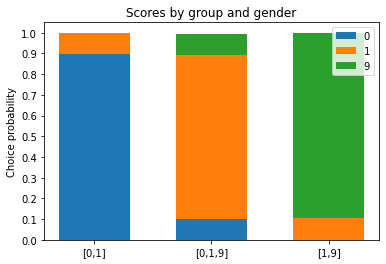

In [35]:
import numpy as np
import matplotlib.pyplot as plt


N = 3
menMeans = (zero_11, zero_22,0)
womenMeans = (one_11, one_22, one_33)
men1Means = (0,0.1,nine_33)
stack3=(one_11,zero_22+one_22,one_33)

ind = np.arange(N)   
width = 0.6     

p1 = plt.bar(ind, menMeans, width)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans)
p3 = plt.bar(ind, men1Means, width,
             bottom=stack3)

plt.xlabel('Assortment set')
plt.ylabel('Choice probability')
plt.title('Scores by group and gender')
plt.xticks(ind, ('[0,1]', '[0,1,9]', '[1,9]'))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend((p1[0], p2[0],p3[0]), ('0', '1','9'))

plt.show()

In [36]:
import numpy as np
import matplotlib.pyplot as plt


N = 3
zero_ = (0.9, 0.1,0)
one_ = (0.1, 0.8, 0.1)
nine_ = (0,0.1,0.9)
stack3=(1,0.9,0.1)

ind = np.arange(N)    
width = 0.5    

p1 = plt.bar(ind, zero_, width)
p2 = plt.bar(ind, one_, width,
             bottom=zero_)
p3 = plt.bar(ind, nine_, width,
             bottom=stack3)

plt.xlabel('Assortment set')
plt.ylabel('Choice probability')
plt.title('Target Probability Distribution ')
plt.xticks(ind, ('[0,1]', '[0,1,9]', '[1,9]'))
plt.yticks(np.arange(0, 1.2, 0.1))
plt.legend((p1[0], p2[0],p3[0]), ('0', '1','9'))

plt.show()

0.8913890516640102